<a href="https://colab.research.google.com/github/claudiogit2019/About-me/blob/main/Proyect_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import os
import json
import ast
import gzip
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

# **Lectura y limpieza de steam_games.json.gz**

In [ ]:
file_path = "/content/drive/MyDrive/Proyect_games/steam_games.json.gz"
data = []

with gzip.open(file_path, "rt", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

In [ ]:
df_gral = pd.DataFrame(data)

In [ ]:
df_gral.shape


(120445, 13)

In [ ]:
df_gral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB


**Lo veamos desde un grafico**

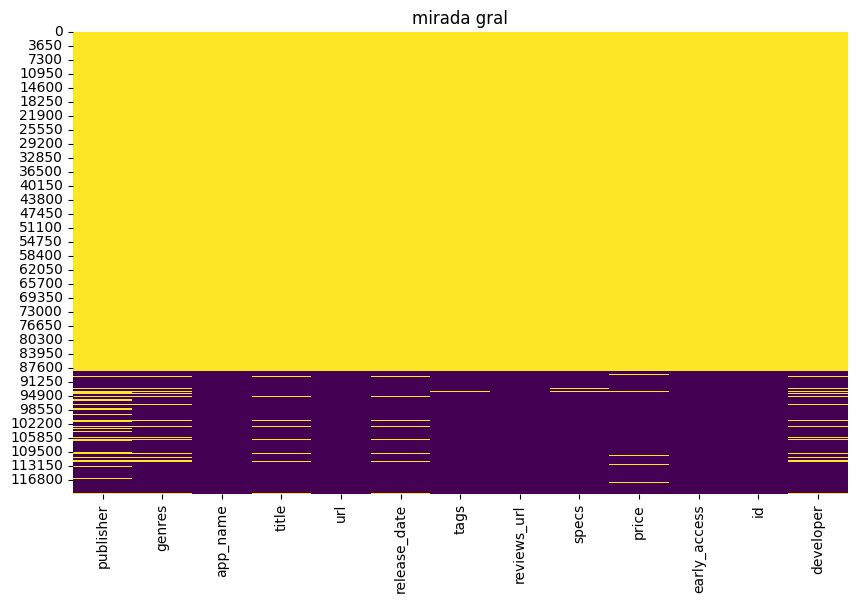

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

**Vamos a tomar la decision de trabajar con los elementos no nulos del dataframe**

In [ ]:
df_gral.head(91251)

publisher                              genres  \
0                      NaN                                 NaN   
1                      NaN                                 NaN   
2                      NaN                                 NaN   
3                      NaN                                 NaN   
4                      NaN                                 NaN   
...                    ...                                 ...   
91246          Tikipod Ltd          [Action, Adventure, Indie]   
91247      Benjamin Bryant       [Action, Free to Play, Indie]   
91248       Rob Lach Games                     [Action, Indie]   
91249  Rob Lach Games, LLC  [Action, Adventure, Indie, Racing]   
91250       Rob Lach Games  [Action, Adventure, Indie, Racing]   

                                                app_name  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
91246                     Rock Boshers DX: Directors Cut   
91247                                            Rexaura   
91248                    POP: Methodology Experiment One   
91249  POP: Methodology Experiment One - Game of The ...   
91250              POP: Methodology Experiment One - OST   

                                                   title  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
91246                     Rock Boshers DX: Directors Cut   
91247                                            Rexaura   
91248                    POP: Methodology Experiment One   
91249  POP: Methodology Experiment One - Game of The ...   
91250              POP: Methodology Experiment One - OST   

                                                     url release_date  \
0                                                    NaN          NaN   
1                                                    NaN          NaN   
2                                                    NaN          NaN   
3                                                    NaN          NaN   
4                                                    NaN          NaN   
...                                                  ...          ...   
91246  http://store.steampowered.com/app/298790/Rock_...   2014-12-10   
91247  http://store.steampowered.com/app/317790/Rexaura/   2014-12-10   
91248  http://store.steampowered.com/app/305800/POP_M...   2012-05-10   
91249  http://store.steampowered.com/app/316070/POP_M...   2014-12-10   
91250  http://store.steampowered.com/app/336320/POP_M...   2012-05-12   

                                                    tags  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
91246  [Action, Indie, Adventure, Retro, Pixel Graphi...   
91247  [Free to Play, Indie, Action, Mod, Puzzle, Fir...   
91248  [Indie, Action, Experimental, Psychedelic, Gre...   
91249                 [Action, Adventure, Indie, Racing]   
91250  [Action, Adventure, Indie, Racing, Great Sound...   

                                             reviews_url  \
0                                                    NaN   
1                                                    NaN   
2   

In [ ]:
df_gral.dropna(inplace=True)

In [ ]:
df_gral.shape

(22530, 13)

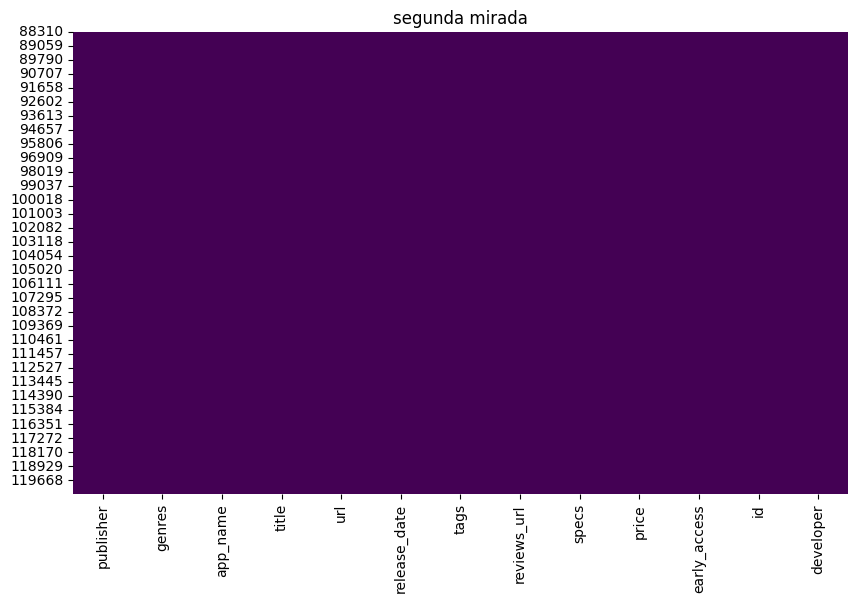

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral.isnull(), cmap='viridis', cbar=False)
plt.title('segunda mirada')
plt.show()

In [ ]:
df_gral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22530 entries, 88310 to 120443
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     22530 non-null  object
 1   genres        22530 non-null  object
 2   app_name      22530 non-null  object
 3   title         22530 non-null  object
 4   url           22530 non-null  object
 5   release_date  22530 non-null  object
 6   tags          22530 non-null  object
 7   reviews_url   22530 non-null  object
 8   specs         22530 non-null  object
 9   price         22530 non-null  object
 10  early_access  22530 non-null  object
 11  id            22530 non-null  object
 12  developer     22530 non-null  object
dtypes: object(13)
memory usage: 2.4+ MB


In [ ]:
df_gral.head(2)

publisher                                         genres  \
88310         Kotoshiro  [Action, Casual, Indie, Simulation, Strategy]   
88311  Making Fun, Inc.           [Free to Play, Indie, RPG, Strategy]   

                  app_name                title  \
88310  Lost Summoner Kitty  Lost Summoner Kitty   
88311            Ironbound            Ironbound   

                                                     url release_date  \
88310  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
88311  http://store.steampowered.com/app/643980/Ironb...   2018-01-04   

                                                    tags  \
88310      [Strategy, Action, Indie, Casual, Simulation]   
88311  [Free to Play, Strategy, Indie, RPG, Card Game...   

                                             reviews_url  \
88310  http://steamcommunity.com/app/761140/reviews/?...   
88311  http://steamcommunity.com/app/643980/reviews/?...   

                                                   specs         price  \
88310                                    [Single-player]          4.99   
88311  [Single-player, Multi-player, Online Multi-Pla...  Free To Play   

      early_access      id         developer  
88310        False  761140         Kotoshiro  
88311        False  643980  Secret Level SRL

In [ ]:
# Descompone la lista en filas separadas
df_gral = df_gral.explode('genres')

In [ ]:
# Resetear índice del dataframe
df_gral.reset_index(drop=True, inplace=True)

In [ ]:
# Creamos las nuevas columnas para cada clave
df_gral = pd.concat([df_gral, pd.json_normalize(df_gral['genres'])], axis=1)

In [ ]:
df_gral.head(2)

publisher  genres             app_name                title  \
0  Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
1  Kotoshiro  Casual  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 url release_date  \
0  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
1  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   

                                            tags  \
0  [Strategy, Action, Indie, Casual, Simulation]   
1  [Strategy, Action, Indie, Casual, Simulation]   

                                         reviews_url            specs price  \
0  http://steamcommunity.com/app/761140/reviews/?...  [Single-player]  4.99   
1  http://steamcommunity.com/app/761140/reviews/?...  [Single-player]  4.99   

  early_access      id  developer  
0        False  761140  Kotoshiro  
1        False  761140  Kotoshiro

In [ ]:
df_gral.shape

(55612, 13)

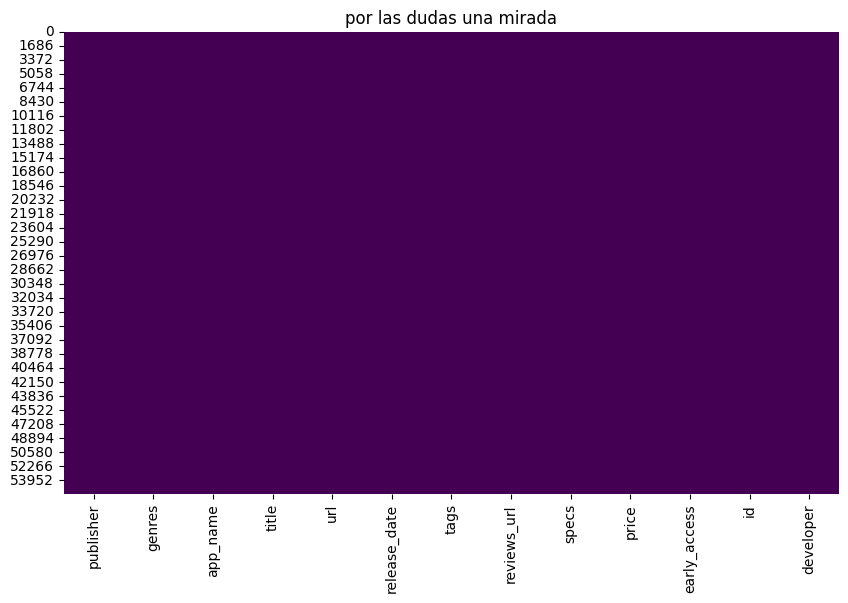

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral.isnull(), cmap='viridis', cbar=False)
plt.title('por las dudas una mirada')
plt.show()

In [ ]:
# Descompone la lista en filas separadas
df_gral = df_gral.explode('tags')

In [ ]:
# Resetear índice del dataframe
df_gral.reset_index(drop=True, inplace=True)

In [ ]:
# Creamos las nuevas columnas para cada clave
df_gral = pd.concat([df_gral, pd.json_normalize(df_gral['tags'])], axis=1)

In [ ]:
df_gral.tail(2)

publisher genres             app_name                title  \
370412  SIXNAILS  Indie  EXIT 2 - Directions  EXIT 2 - Directions   
370413  SIXNAILS  Indie  EXIT 2 - Directions  EXIT 2 - Directions   

                                                      url release_date  \
370412  http://store.steampowered.com/app/658870/EXIT_...   2017-09-02   
370413  http://store.steampowered.com/app/658870/EXIT_...   2017-09-02   

               tags                                        reviews_url  \
370412  Atmospheric  http://steamcommunity.com/app/658870/reviews/?...   
370413     Relaxing  http://steamcommunity.com/app/658870/reviews/?...   

                                                   specs price early_access  \
370412  [Single-player, Steam Achievements, Steam Cloud]  4.99        False   
370413  [Single-player, Steam Achievements, Steam Cloud]  4.99        False   

            id      developer  
370412  658870  xropi,stev3ns  
370413  658870  xropi,stev3ns

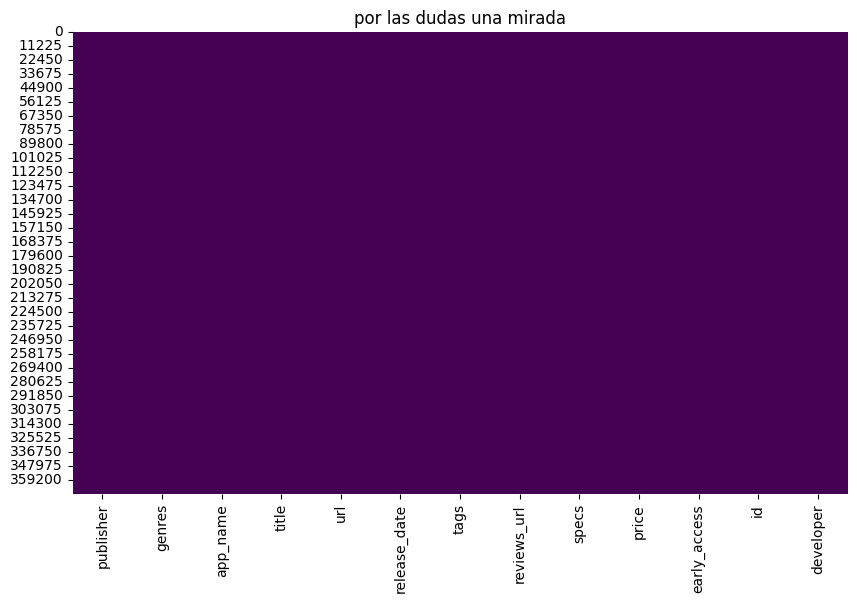

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral.isnull(), cmap='viridis', cbar=False)
plt.title('por las dudas una mirada')
plt.show()

In [ ]:
# Descompone la lista en filas separadas
df_gral = df_gral.explode('specs')

In [ ]:
# Resetear índice del dataframe
df_gral.reset_index(drop=True, inplace=True)

In [ ]:
# Creamos las nuevas columnas para cada clave
df_gral = pd.concat([df_gral, pd.json_normalize(df_gral['specs'])], axis=1)

In [ ]:
df_gral.tail(2)

publisher genres             app_name                title  \
1681638  SIXNAILS  Indie  EXIT 2 - Directions  EXIT 2 - Directions   
1681639  SIXNAILS  Indie  EXIT 2 - Directions  EXIT 2 - Directions   

                                                       url release_date  \
1681638  http://store.steampowered.com/app/658870/EXIT_...   2017-09-02   
1681639  http://store.steampowered.com/app/658870/EXIT_...   2017-09-02   

             tags                                        reviews_url  \
1681638  Relaxing  http://steamcommunity.com/app/658870/reviews/?...   
1681639  Relaxing  http://steamcommunity.com/app/658870/reviews/?...   

                      specs price early_access      id      developer  
1681638  Steam Achievements  4.99        False  658870  xropi,stev3ns  
1681639         Steam Cloud  4.99        False  658870  xropi,stev3ns

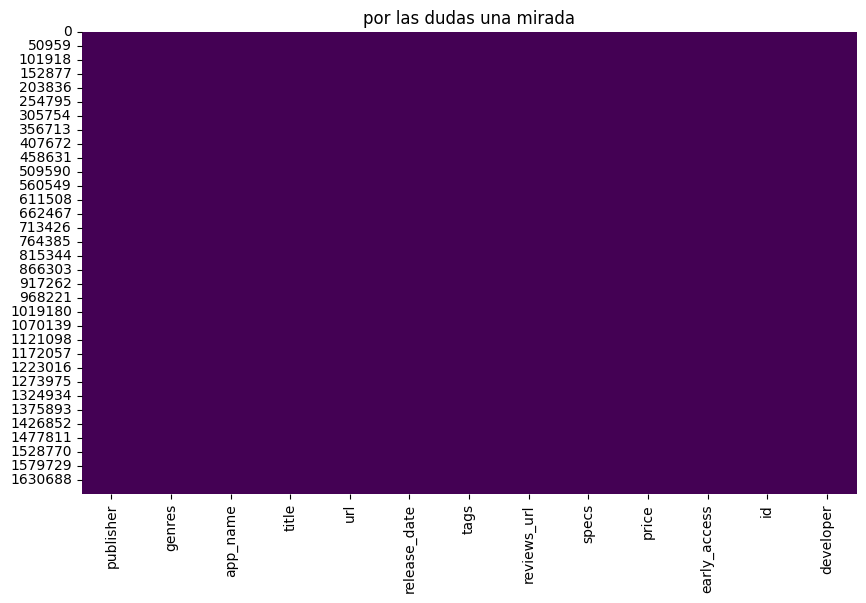

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral.isnull(), cmap='viridis', cbar=False)
plt.title('por las dudas una mirada')
plt.show()

**Vamos a renombrar las Columnas a Español**

In [ ]:
df_gral.columns = ['Empresa_publicadora','Genero','Nombre_del_contenido', 'Titulo', 'URL', 'Lanzamiento', 'Etiquetas', 'Reviews_de_contenido','Especificaciones','Precio','Acceso_Temprano','Id','Desarrollador']

In [ ]:
df_gral[2035:2040]

Empresa_publicadora  Genero Nombre_del_contenido               Titulo  \
2035            dev4play     RPG          Fallen Mage          Fallen Mage   
2036            dev4play     RPG          Fallen Mage          Fallen Mage   
2037            dev4play     RPG          Fallen Mage          Fallen Mage   
2038            ETGgames  Casual  Vaporwave Simulator  Vaporwave Simulator   
2039            ETGgames  Casual  Vaporwave Simulator  Vaporwave Simulator   

                                                    URL Lanzamiento Etiquetas  \
2035  http://store.steampowered.com/app/752360/Falle...  2016-11-25    Action   
2036  http://store.steampowered.com/app/752360/Falle...  2016-11-25       RPG   
2037  http://store.steampowered.com/app/752360/Falle...  2016-11-25     Indie   
2038  http://store.steampowered.com/app/766850/Vapor...  2018-01-01    Casual   
2039  http://store.steampowered.com/app/766850/Vapor...  2018-01-01     Indie   

                                   Reviews_de_contenido Especificaciones  \
2035  http://steamcommunity.com/app/752360/reviews/?...    Single-player   
2036  http://steamcommunity.com/app/752360/reviews/?...    Single-player   
2037  http://steamcommunity.com/app/752360/reviews/?...    Single-player   
2038  http://steamcommunity.com/app/766850/reviews/?...    Single-player   
2039  http://steamcommunity.com/app/766850/reviews/?...    Single-player   

     Precio Acceso_Temprano      Id Desarrollador  
2035   1.99           False  752360      dev4play  
2036   1.99           False  752360      dev4play  
2037   1.99           False  752360      dev4play  
2038   0.99           False  766850      ETGgames  
2039   0.99           False  766850      ETGgames

In [ ]:
#df_gral.dropna(inplace=True)

In [ ]:
#df_gral['Lanzamiento'] = df_gral['Lanzamiento'].apply(lambda x: pd.to_datetime(x, errors='coerce').year).astype(int)


In [ ]:
df_gral.head(2)

Empresa_publicadora  Genero Nombre_del_contenido               Titulo  \
0           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
1           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 URL Lanzamiento Etiquetas  \
0  http://store.steampowered.com/app/761140/Lost_...  2018-01-04  Strategy   
1  http://store.steampowered.com/app/761140/Lost_...  2018-01-04    Action   

                                Reviews_de_contenido Especificaciones Precio  \
0  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   
1  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   

  Acceso_Temprano      Id Desarrollador  
0           False  761140     Kotoshiro  
1           False  761140     Kotoshiro

**Ultima mirada del dataframe, listo para ir a un EDA**

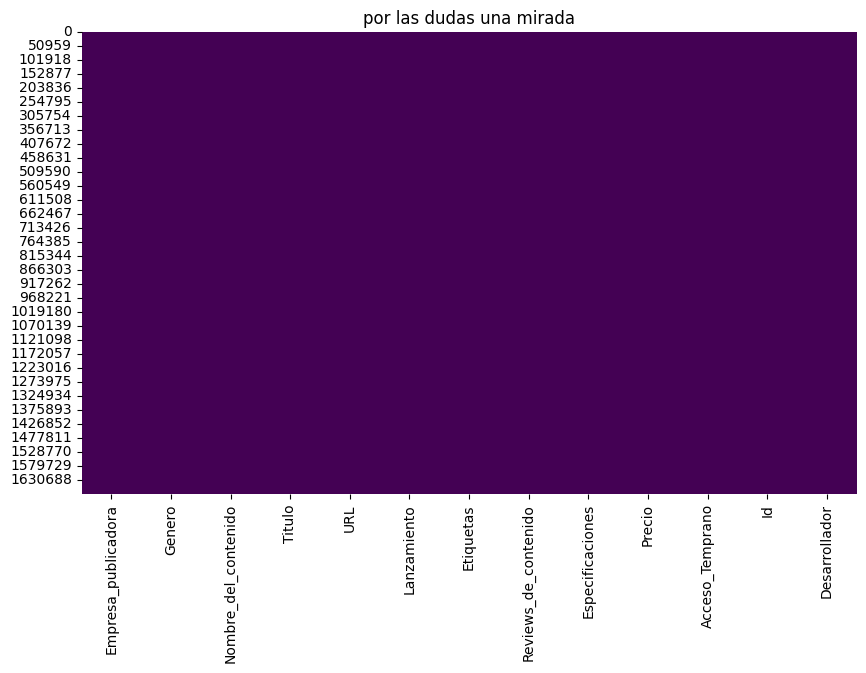

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral.isnull(), cmap='viridis', cbar=False)
plt.title('por las dudas una mirada')
plt.show()

In [ ]:
df_gral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681640 entries, 0 to 1681639
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Empresa_publicadora   1681640 non-null  object
 1   Genero                1681640 non-null  object
 2   Nombre_del_contenido  1681640 non-null  object
 3   Titulo                1681640 non-null  object
 4   URL                   1681640 non-null  object
 5   Lanzamiento           1681640 non-null  object
 6   Etiquetas             1681640 non-null  object
 7   Reviews_de_contenido  1681640 non-null  object
 8   Especificaciones      1681640 non-null  object
 9   Precio                1681640 non-null  object
 10  Acceso_Temprano       1681640 non-null  object
 11  Id                    1681640 non-null  object
 12  Desarrollador         1681640 non-null  object
dtypes: object(13)
memory usage: 166.8+ MB


In [ ]:
df_gral.head(5)

Empresa_publicadora  Genero Nombre_del_contenido               Titulo  \
0           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
1           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
2           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
3           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
4           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 URL Lanzamiento   Etiquetas  \
0  http://store.steampowered.com/app/761140/Lost_...  2018-01-04    Strategy   
1  http://store.steampowered.com/app/761140/Lost_...  2018-01-04      Action   
2  http://store.steampowered.com/app/761140/Lost_...  2018-01-04       Indie   
3  http://store.steampowered.com/app/761140/Lost_...  2018-01-04      Casual   
4  http://store.steampowered.com/app/761140/Lost_...  2018-01-04  Simulation   

                                Reviews_de_contenido Especificaciones Precio  \
0  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   
1  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   
2  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   
3  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   
4  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   

  Acceso_Temprano      Id Desarrollador  
0           False  761140     Kotoshiro  
1           False  761140     Kotoshiro  
2           False  761140     Kotoshiro  
3           False  761140     Kotoshiro  
4           False  761140     Kotoshiro

In [ ]:

df_gral['Lanzamiento'] = pd.to_datetime(df_gral['Lanzamiento'], errors='coerce')




In [ ]:
df_gral['Lanzamiento'] = df_gral['Lanzamiento'].dt.year


In [ ]:
df_gral.head(3)

Empresa_publicadora  Genero Nombre_del_contenido               Titulo  \
0           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
1           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
2           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 URL  Lanzamiento Etiquetas  \
0  http://store.steampowered.com/app/761140/Lost_...       2018.0  Strategy   
1  http://store.steampowered.com/app/761140/Lost_...       2018.0    Action   
2  http://store.steampowered.com/app/761140/Lost_...       2018.0     Indie   

                                Reviews_de_contenido Especificaciones Precio  \
0  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   
1  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   
2  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   

  Acceso_Temprano      Id Desarrollador  
0           False  761140     Kotoshiro  
1           False  761140     Kotoshiro  
2           False  761140     Kotoshiro

In [ ]:
df_gral['Lanzamiento'].unique().tolist()

[2018.0,
 2017.0,
 1997.0,
 1998.0,
 2016.0,
 2006.0,
 2005.0,
 2003.0,
 2007.0,
 2002.0,
 2000.0,
 1995.0,
 1996.0,
 1994.0,
 2001.0,
 1993.0,
 2004.0,
 2008.0,
 2009.0,
 1999.0,
 1992.0,
 1989.0,
 2010.0,
 2011.0,
 2013.0,
 2012.0,
 2014.0,
 1983.0,
 1984.0,
 2015.0,
 1990.0,
 1988.0,
 1991.0,
 1987.0,
 1986.0,
 nan,
 2021.0,
 2019.0,
 1985.0]

In [ ]:
df_gral.dropna(inplace=True)

In [ ]:
df_gral['Lanzamiento'].unique().tolist()

[2018.0,
 2017.0,
 1997.0,
 1998.0,
 2016.0,
 2006.0,
 2005.0,
 2003.0,
 2007.0,
 2002.0,
 2000.0,
 1995.0,
 1996.0,
 1994.0,
 2001.0,
 1993.0,
 2004.0,
 2008.0,
 2009.0,
 1999.0,
 1992.0,
 1989.0,
 2010.0,
 2011.0,
 2013.0,
 2012.0,
 2014.0,
 1983.0,
 1984.0,
 2015.0,
 1990.0,
 1988.0,
 1991.0,
 1987.0,
 1986.0,
 2021.0,
 2019.0,
 1985.0]

In [ ]:
df_gral['Lanzamiento'] = df_gral['Lanzamiento'].astype(int)

In [ ]:
df_gral.head(3)

Empresa_publicadora  Genero Nombre_del_contenido               Titulo  \
0           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
1           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
2           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 URL  Lanzamiento Etiquetas  \
0  http://store.steampowered.com/app/761140/Lost_...         2018  Strategy   
1  http://store.steampowered.com/app/761140/Lost_...         2018    Action   
2  http://store.steampowered.com/app/761140/Lost_...         2018     Indie   

                                Reviews_de_contenido Especificaciones Precio  \
0  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   
1  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   
2  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   

  Acceso_Temprano      Id Desarrollador  
0           False  761140     Kotoshiro  
1           False  761140     Kotoshiro  
2           False  761140     Kotoshiro

In [ ]:
df_gral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681511 entries, 0 to 1681639
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Empresa_publicadora   1681511 non-null  object
 1   Genero                1681511 non-null  object
 2   Nombre_del_contenido  1681511 non-null  object
 3   Titulo                1681511 non-null  object
 4   URL                   1681511 non-null  object
 5   Lanzamiento           1681511 non-null  int64 
 6   Etiquetas             1681511 non-null  object
 7   Reviews_de_contenido  1681511 non-null  object
 8   Especificaciones      1681511 non-null  object
 9   Precio                1681511 non-null  object
 10  Acceso_Temprano       1681511 non-null  object
 11  Id                    1681511 non-null  object
 12  Desarrollador         1681511 non-null  object
dtypes: int64(1), object(12)
memory usage: 179.6+ MB


In [ ]:
df_gral_eda =df_gral


In [ ]:
df_gral= df_gral[0:20000]

In [ ]:
df_gral.shape

(20000, 13)

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral.to_csv("/content/drive/MyDrive/Proyect_games/dfx_steam_games.csv", index=True)

In [ ]:
#df_gral = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_steam_games.csv')
#df_gral.to_parquet('/content/drive/MyDrive/Proyect_games/dfx_steam_games.parquet')

# **Lectura y Limpieza users_reviews.json.gz**

In [ ]:
def obtener_datos_json(ruta):
    with gzip.open(ruta, "rt", encoding="utf-8") as file:
        return [ast.literal_eval(line.strip()) for line in file]

ruta = "/content/drive/MyDrive/Proyect_games/user_reviews.json.gz"
datos = obtener_datos_json(ruta)

df = pd.DataFrame(datos)

df.head()

user_id                                           user_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1            js41637               http://steamcommunity.com/id/js41637   
2          evcentric             http://steamcommunity.com/id/evcentric   
3              doctr                 http://steamcommunity.com/id/doctr   
4          maplemage             http://steamcommunity.com/id/maplemage   

                                             reviews  
0  [{'funny': '', 'posted': 'Posted November 5, 2...  
1  [{'funny': '', 'posted': 'Posted June 24, 2014...  
2  [{'funny': '', 'posted': 'Posted February 3.',...  
3  [{'funny': '', 'posted': 'Posted October 14, 2...  
4  [{'funny': '3 people found this review funny',...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [ ]:
df.shape

(25799, 3)

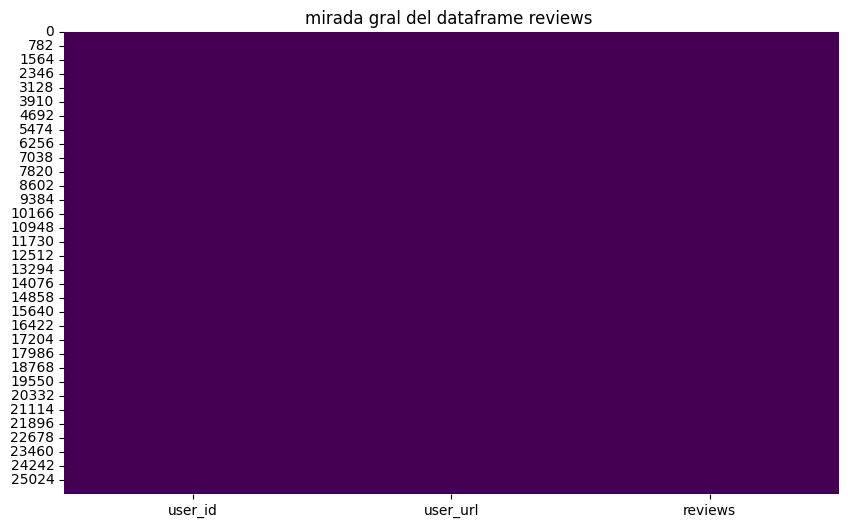

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral del dataframe reviews ')
plt.show()

**Vamos a desanidar la columnas reviews**

In [ ]:
def extraer_data(df):
    rev = df['reviews'].explode()
    df = df.drop('reviews', axis=1)
    df = df.join(rev.apply(pd.Series))
    return df

In [ ]:
df = extraer_data(df.copy())

In [ ]:
df.head(3)

user_id                                           user_url funny  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...         
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...         
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...         

                     posted last_edited item_id         helpful recommend  \
0  Posted November 5, 2011.                1250  No ratings yet      True   
0     Posted July 15, 2011.               22200  No ratings yet      True   
0    Posted April 21, 2011.               43110  No ratings yet      True   

                                              review   0  
0  Simple yet with great replayability. In my opi... NaN  
0               It's unique and worth a playthrough. NaN  
0  Great atmosphere. The gunplay can be a bit chu... NaN

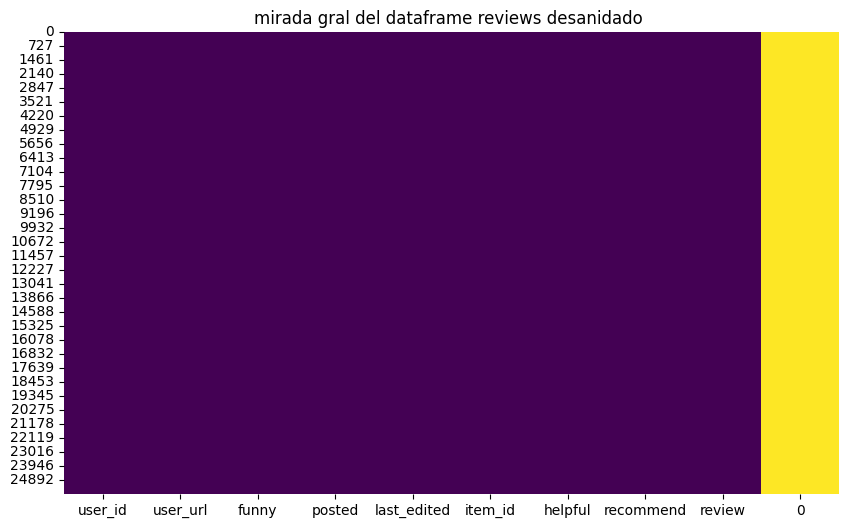

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral del dataframe reviews desanidado ')
plt.show()

In [ ]:
df = df.drop(columns = [0])

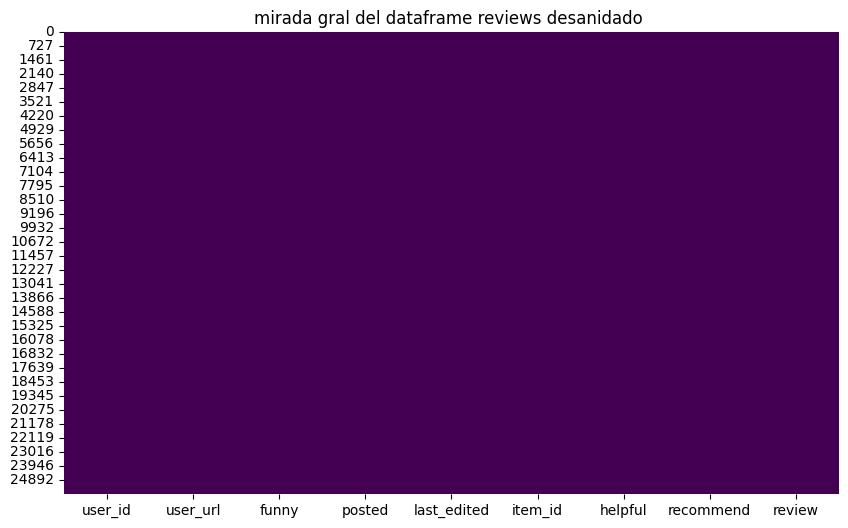

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral del dataframe reviews desanidado ')
plt.show()

**Renombrar columnas del Dataframe**

In [ ]:
df.columns = ['User_id','User_url','Divertido', 'Posteo', 'Ultima_Edicion', 'Item_id', 'Util', 'Recomendacion','Critica']

In [ ]:
df.tail(30000)

User_id                                           User_url  \
11705       EliteCookies          http://steamcommunity.com/id/EliteCookies   
11705       EliteCookies          http://steamcommunity.com/id/EliteCookies   
11705       EliteCookies          http://steamcommunity.com/id/EliteCookies   
11705       EliteCookies          http://steamcommunity.com/id/EliteCookies   
11705       EliteCookies          http://steamcommunity.com/id/EliteCookies   
...                  ...                                                ...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   

                              Divertido                    Posteo  \
11705                                    Posted January 22, 2013.   
11705  1 person found this review funny          Posted April 23.   
11705                                        Posted July 3, 2014.   
11705                                    Posted February 8, 2014.   
11705                                      Posted March 12, 2013.   
...                                 ...                       ...   
25797                                             Posted July 10.   
25797                                              Posted July 8.   
25798  1 person found this review funny            Posted July 3.   
25798                                             Posted July 20.   
25798                                              Posted July 2.   

      Ultima_Edicion Item_id                                            Util  \
11705                  72850  1 of 1 people (100%) found this review helpful   
11705                 227940    0 of 3 people (0%) found this review helpful   
11705                 218620                                  No ratings yet   
11705                 211820                                  No ratings yet   
11705                    440                                  No ratings yet   
...              ...     ...                                             ...   
25797                     70                                  No ratings yet   
25797                 362890                                  No ratings yet   
25798                 273110   1 of 2 people (50%) found this review helpful   
25798                    730                                  No ratings yet   
25798                    440                                  No ratings yet   

      Recomendacion                                            Critica  
11705          True  Really fun to play and to play around with the...  
11705         False                           Cannon fodder simulator.  
11705          True  Fun to play and such but there is too much bag...  
11705          True                                         Epic game!  
11705          True  Most addictive and fun game out there AND ITS ...  
...             ...                                                ...  
25797          True  a must have classic from steam definitely wort...  
25797          True  this game is a perfect remake of the original ...  
25798          True  had so much fun plaing this and collecting res...  
25798          True                                                 :D  
25798          True                                     so much fun :D  

[30000 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59333 entries, 0 to 25798
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User_id         59333 non-null  object
 1   User_url        59333 non-null  object
 2   Divertido       59305 non-null  object
 3   Posteo          59305 non-null  object
 4   Ultima_Edicion  59305 non-null  object
 5   Item_id         59305 non-null  object
 6   Util            59305 non-null  object
 7   Recomendacion   59305 non-null  object
 8   Critica         59305 non-null  object
dtypes: object(9)
memory usage: 4.5+ MB


In [ ]:
df_eda = df

In [ ]:
# Guardar el DataFrame en un archivo CSV
df.to_csv("/content/drive/MyDrive/Proyect_games/dfx_user_review.csv", index=True)

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_user_review.csv')
#df.to_parquet('/content/drive/MyDrive/Proyect_games/dfx_user_review.parquet')

# **Lectura y Limpieza users_items.json.gz**

In [ ]:
def obtener_datos_json(ruta):
    with gzip.open(ruta, "rt", encoding="utf-8") as file:
        return [ast.literal_eval(line.strip()) for line in file]

ruta = "/content/drive/MyDrive/Proyect_games/users_items.json.gz"
datos = obtener_datos_json(ruta)

df2 = pd.DataFrame(datos)

df2.head()

user_id  items_count           steam_id  \
0  76561197970982479          277  76561197970982479   
1            js41637          888  76561198035864385   
2          evcentric          137  76561198007712555   
3         Riot-Punch          328  76561197963445855   
4              doctr          541  76561198002099482   

                                            user_url  \
0  http://steamcommunity.com/profiles/76561197970...   
1               http://steamcommunity.com/id/js41637   
2             http://steamcommunity.com/id/evcentric   
3            http://steamcommunity.com/id/Riot-Punch   
4                 http://steamcommunity.com/id/doctr   

                                               items  
0  [{'item_id': '10', 'item_name': 'Counter-Strik...  
1  [{'item_id': '10', 'item_name': 'Counter-Strik...  
2  [{'item_id': '1200', 'item_name': 'Red Orchest...  
3  [{'item_id': '10', 'item_name': 'Counter-Strik...  
4  [{'item_id': '300', 'item_name': 'Day of Defea...

In [ ]:
df2.columns

Index(['user_id', 'items_count', 'steam_id', 'user_url', 'items'], dtype='object')

In [ ]:
df2.shape

(88310, 5)

In [ ]:
# Descompone la lista en filas separadas
df2 = df2.explode('items')

In [ ]:
# Resetear índice del dataframe
df2.reset_index(drop=True, inplace=True)

In [ ]:
# Creamos las nuevas columnas para cada clave
df2 = pd.concat([df2, pd.json_normalize(df2['items'])], axis=1)

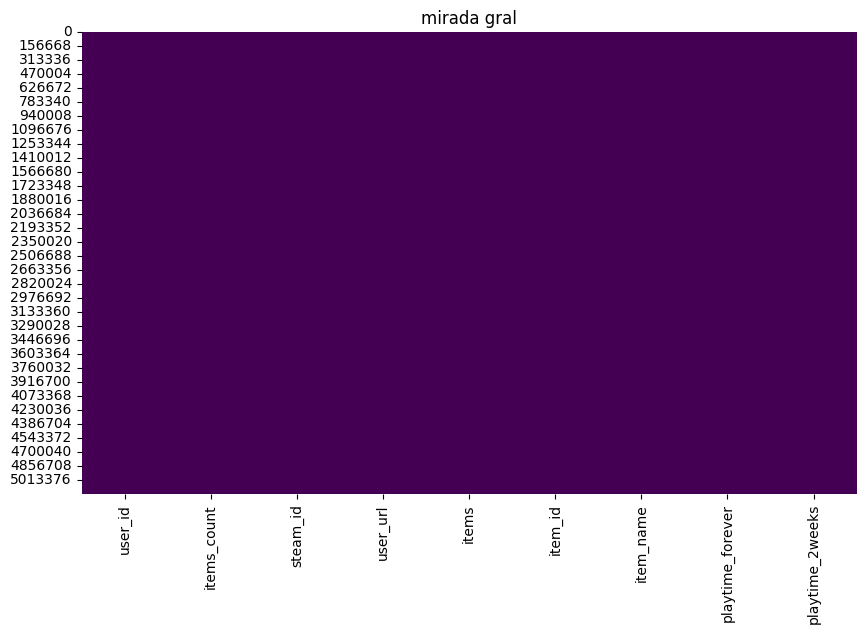

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df2.isnull().sum()

user_id                 0
items_count             0
steam_id                0
user_url                0
items               16806
item_id             16806
item_name           16806
playtime_forever    16806
playtime_2weeks     16806
dtype: int64

In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5153209 entries, 0 to 5170013
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          object 
 3   user_url          object 
 4   items             object 
 5   item_id           object 
 6   item_name         object 
 7   playtime_forever  float64
 8   playtime_2weeks   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 393.2+ MB


In [ ]:
df2.head(200000)

user_id  items_count           steam_id  \
0       76561197970982479          277  76561197970982479   
1       76561197970982479          277  76561197970982479   
2       76561197970982479          277  76561197970982479   
3       76561197970982479          277  76561197970982479   
4       76561197970982479          277  76561197970982479   
...                   ...          ...                ...   
200270    DeliciousPuddin          140  76561198094288138   
200271    DeliciousPuddin          140  76561198094288138   
200272    DeliciousPuddin          140  76561198094288138   
200273    DeliciousPuddin          140  76561198094288138   
200274    DeliciousPuddin          140  76561198094288138   

                                                 user_url  \
0       http://steamcommunity.com/profiles/76561197970...   
1       http://steamcommunity.com/profiles/76561197970...   
2       http://steamcommunity.com/profiles/76561197970...   
3       http://steamcommunity.com/profiles/76561197970...   
4       http://steamcommunity.com/profiles/76561197970...   
...                                                   ...   
200270       http://steamcommunity.com/id/DeliciousPuddin   
200271       http://steamcommunity.com/id/DeliciousPuddin   
200272       http://steamcommunity.com/id/DeliciousPuddin   
200273       http://steamcommunity.com/id/DeliciousPuddin   
200274       http://steamcommunity.com/id/DeliciousPuddin   

                                                    items item_id  \
0       {'item_id': '10', 'item_name': 'Counter-Strike...      10   
1       {'item_id': '20', 'item_name': 'Team Fortress ...      20   
2       {'item_id': '30', 'item_name': 'Day of Defeat'...      30   
3       {'item_id': '40', 'item_name': 'Deathmatch Cla...      40   
4       {'item_id': '50', 'item_name': 'Half-Life: Opp...      50   
...                                                   ...     ...   
200270  {'item_id': '12220', 'item_name': 'Grand Theft...   12220   
200271  {'item_id': '40800', 'item_name': 'Super Meat ...   40800   
200272  {'item_id': '9010', 'item_name': 'Return to Ca...    9010   
200273  {'item_id': '47890', 'item_name': 'The Sims(TM...   47890   
200274  {'item_id': '620', 'item_name': 'Portal 2', 'p...     620   

                                           item_name  playtime_forever  \
0                                     Counter-Strike               6.0   
1                              Team Fortress Classic               0.0   
2                                      Day of Defeat               7.0   
3                                 Deathmatch Classic               0.0   
4                          Half-Life: Opposing Force               0.0   
...                                              ...               ...   
200270  Grand Theft Auto: Episodes from Liberty City             352.0   
200271                                Super Meat Boy              36.0   
200272                  Return to Castle Wolfenstein             131.0   
200273                                The Sims(TM) 3           12356.0   
200274                                      Portal 2               0.0   

        playtime_2weeks  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
200270              0.0  
200271              0.0  
200272              0.0  
200273              0.0  
200274              0.0  

[200000 rows x 9 columns]

In [ ]:
df2 = df2.drop(columns = ['items'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5153209 entries, 0 to 5170013
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          object 
 3   user_url          object 
 4   item_id           object 
 5   item_name         object 
 6   playtime_forever  float64
 7   playtime_2weeks   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 353.8+ MB


**Renombrar columnas del Dataframe**

In [ ]:
df2.columns = ['user_id',	'items_cantidad',	'steam_id',	'usuario_url','item_id',	'item_nombre',	'tiempo_Juego_total',	'tiempo_de_Juego_en_2_semanas']

In [ ]:
df2.head()

user_id  items_cantidad           steam_id  \
0  76561197970982479             277  76561197970982479   
1  76561197970982479             277  76561197970982479   
2  76561197970982479             277  76561197970982479   
3  76561197970982479             277  76561197970982479   
4  76561197970982479             277  76561197970982479   

                                         usuario_url item_id  \
0  http://steamcommunity.com/profiles/76561197970...      10   
1  http://steamcommunity.com/profiles/76561197970...      20   
2  http://steamcommunity.com/profiles/76561197970...      30   
3  http://steamcommunity.com/profiles/76561197970...      40   
4  http://steamcommunity.com/profiles/76561197970...      50   

                 item_nombre  tiempo_Juego_total  tiempo_de_Juego_en_2_semanas  
0             Counter-Strike                 6.0                           0.0  
1      Team Fortress Classic                 0.0                           0.0  
2              Day of Defeat                 7.0                           0.0  
3         Deathmatch Classic                 0.0                           0.0  
4  Half-Life: Opposing Force                 0.0                           0.0

In [ ]:
df2= df2[0:10000]

In [ ]:
# Guardar el DataFrame en un archivo CSV
df2.to_csv("/content/drive/MyDrive/Proyect_games/dfx_user_items.csv", index=True)

In [ ]:
#df2 = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_user_items.csv')
#df2.to_parquet('/content/drive/MyDrive/Proyect_games/dfx_user_items.parquet')

# **Analisis de Sentimiento**

**consigna: **
 En el dataset user_reviews se incluyen reseñas de juegos hechos por distintos usuarios. Debes crear la columna 'sentiment_analysis' aplicando análisis de sentimiento con NLP con la siguiente escala: debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. Esta nueva columna debe reemplazar la de user_reviews.review para facilitar el trabajo de los modelos de machine learning y el análisis de datos. De no ser posible este análisis por estar ausente la reseña escrita, debe tomar el valor de 1.

**Analsis de Sentimiento** tomada del siguiente articulo, https://neuraldojo.org/proyectos/analisis-de-sentimiento/guia-basica-de-analisis-de-sentimiento-en-python/

**Paso 1: Leer el dataframe**

**Paso 2: Análisis de Datos**

Columna a analizar

posted

recommend

review

**Ahora crearemos la nube de palabras “wordclouds” más utilizadas en las reseñas empleando la librería “NLTK” y la librería “wordcloud”.**

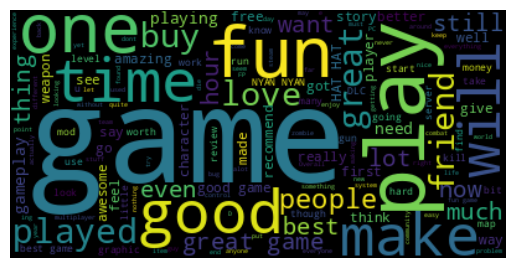

In [ ]:
# lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(Critica) for Critica in df.Critica)

# nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Paso 3: Clasificando los tweets**

In [ ]:
df['Sentimiento'] = df['Recomendacion'].apply(lambda Recomendacion: 2 if Recomendacion else 0)


In [ ]:
df.tail(2)

User_id                                  User_url Divertido  \
25798  LydiaMorley  http://steamcommunity.com/id/LydiaMorley             
25798  LydiaMorley  http://steamcommunity.com/id/LydiaMorley             

                Posteo Ultima_Edicion Item_id            Util Recomendacion  \
25798  Posted July 20.                    730  No ratings yet          True   
25798   Posted July 2.                    440  No ratings yet          True   

              Critica  Sentimiento  
25798              :D            2  
25798  so much fun :D            2

In [ ]:
df['Posteo'] = df['Posteo'].str.extract(r'(\w+\s\d+,\s\d{4})')[0]


df['Posteo'] = pd.to_datetime(df['Posteo'], format='%B %d, %Y').dt.strftime('%d-%m-%Y')




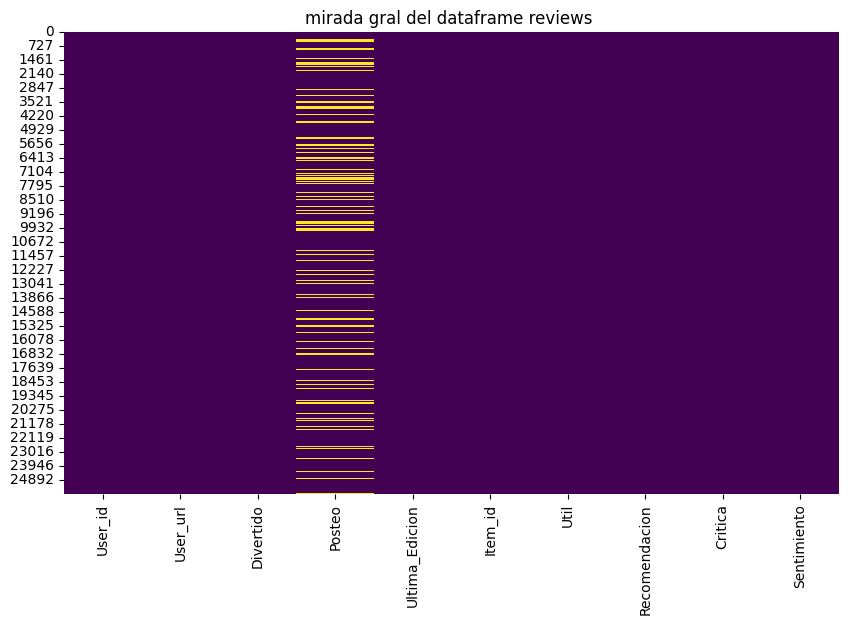

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral del dataframe reviews ')
plt.show()

In [ ]:
df= df[pd.to_datetime(df['Posteo'], errors='coerce').notna()]

<ipython-input-89-57dc22588f33>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



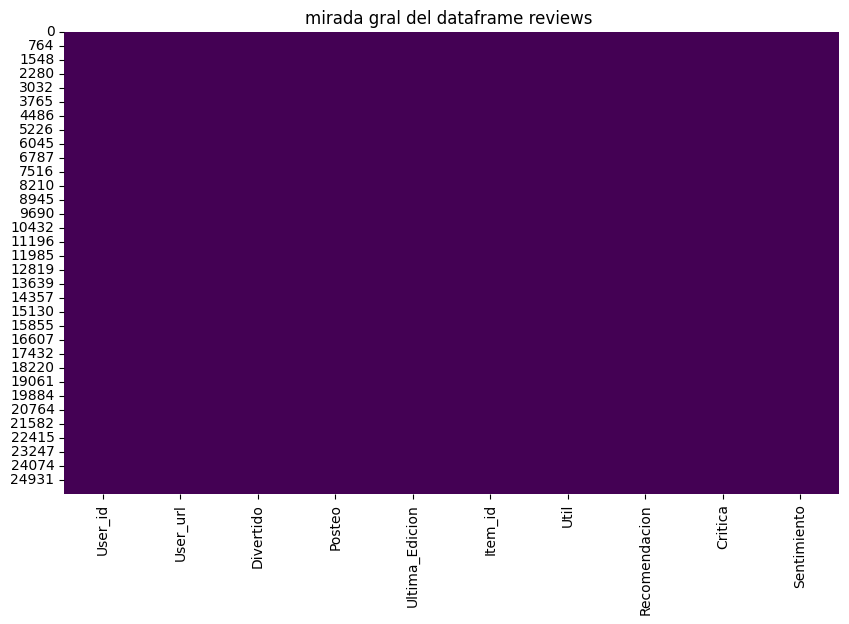

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral del dataframe reviews ')
plt.show()

In [ ]:
df[['Posteo','Recomendacion', 'Sentimiento']]

Posteo Recomendacion  Sentimiento
0      05-11-2011          True            2
0      15-07-2011          True            2
0      21-04-2011          True            2
1      24-06-2014          True            2
1      08-09-2013          True            2
...           ...           ...          ...
25764  14-10-2015          True            2
25765  10-10-2015          True            2
25769  31-10-2015          True            2
25771  14-12-2015          True            2
25780  29-12-2015          True            2

[49186 rows x 3 columns]

In [ ]:
len(df['Sentimiento'].unique())

2

In [ ]:
df['Sentimiento'].unique().tolist()

[2, 0]

In [ ]:
#df['Posteo'] = df['Posteo'].apply(lambda x: pd.to_datetime(x, errors='coerce').year).astype(int)


In [ ]:
df.head(2)

User_id                                           User_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   

  Divertido      Posteo Ultima_Edicion Item_id            Util Recomendacion  \
0            05-11-2011                   1250  No ratings yet          True   
0            15-07-2011                  22200  No ratings yet          True   

                                             Critica  Sentimiento  
0  Simple yet with great replayability. In my opi...            2  
0               It's unique and worth a playthrough.            2

In [ ]:
df_gral.head(2)

Empresa_publicadora  Genero Nombre_del_contenido               Titulo  \
0           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   
1           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 URL  Lanzamiento Etiquetas  \
0  http://store.steampowered.com/app/761140/Lost_...         2018  Strategy   
1  http://store.steampowered.com/app/761140/Lost_...         2018    Action   

                                Reviews_de_contenido Especificaciones Precio  \
0  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   
1  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   

  Acceso_Temprano      Id Desarrollador  
0           False  761140     Kotoshiro  
1           False  761140     Kotoshiro

In [ ]:
df_gral.columns = ['Empresa_publicadora','Genero','Nombre_del_contenido', 'Titulo', 'URL', 'Lanzamiento', 'Etiquetas', 'Reviews_de_contenido','Especificaciones','Precio','Acceso_Temprano','Item_id','Desarrollador']

In [ ]:
df_gral = df_gral.drop(columns = ['Empresa_publicadora','Genero', 'Titulo', 'URL', 'Etiquetas', 'Reviews_de_contenido','Especificaciones','Precio','Acceso_Temprano','Desarrollador'])

In [ ]:
df_gral.head(4)

Nombre_del_contenido  Lanzamiento Item_id
0  Lost Summoner Kitty         2018  761140
1  Lost Summoner Kitty         2018  761140
2  Lost Summoner Kitty         2018  761140
3  Lost Summoner Kitty         2018  761140

In [ ]:
df = df.drop(columns = ['User_id',	'User_url',	'Divertido',	'Posteo',	'Ultima_Edicion',	'Util',	'Critica'])

In [ ]:
df.head(4)

Item_id Recomendacion  Sentimiento
0    1250          True            2
0   22200          True            2
0   43110          True            2
1  251610          True            2

In [ ]:
merge_sentimiento= pd.merge(df_gral,df, on = "Item_id")

In [ ]:
merge_sentimiento.head(4)

Nombre_del_contenido  Lanzamiento Item_id Recomendacion  Sentimiento
0            Half-Life         1998      70          True            2
1            Half-Life         1998      70          True            2
2            Half-Life         1998      70          True            2
3            Half-Life         1998      70          True            2

In [ ]:
merge_sentimiento['Lanzamiento'].unique().tolist()

[1998,
 2006,
 2005,
 2000,
 2007,
 1995,
 1994,
 2001,
 2004,
 2003,
 2008,
 1997,
 1993,
 2009,
 2002,
 2010,
 2011]

In [ ]:
merge_sentimiento.shape

(915943, 5)

In [ ]:
merge_sentimiento = merge_sentimiento[0:5000]

In [ ]:
#merge_sentimiento['Lanzamiento'] = merge_sentimiento['Lanzamiento'].apply(lambda x: pd.to_datetime(x, errors='coerce').year).astype(int)

In [ ]:
#merge_sentimiento['Lanzamiento'].unique().tolist()

In [ ]:
# Guardar el DataFrame en un archivo CSV
merge_sentimiento.to_csv("/content/drive/MyDrive/Proyect_games/dfx_sentimiento.csv", index=True)

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_sentimiento.csv')
#df.to_parquet('/content/drive/MyDrive/Proyect_games/dfx_sentimiento.parquet')

# **Otras Pruebas**

In [ ]:
dfp1 = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_sentimiento.csv')

<ipython-input-3-6ae5dd7af188>:1: DtypeWarning:

Columns (1,2,3,4,5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
dfp1.head(3)

Unnamed: 0            User_id  \
0          0  76561197970982479   
1          0  76561197970982479   
2          0  76561197970982479   

                                            User_url Divertido      Posteo  \
0  http://steamcommunity.com/profiles/76561197970...       NaN  05-11-2011   
1  http://steamcommunity.com/profiles/76561197970...       NaN  15-07-2011   
2  http://steamcommunity.com/profiles/76561197970...       NaN  21-04-2011   

  Ultima_Edicion  Item_id            Util Recomendacion  \
0            NaN   1250.0  No ratings yet          True   
1            NaN  22200.0  No ratings yet          True   
2            NaN  43110.0  No ratings yet          True   

                                             Critica  Sentimiento  
0  Simple yet with great replayability. In my opi...          2.0  
1               It's unique and worth a playthrough.          2.0  
2  Great atmosphere. The gunplay can be a bit chu...          2.0

In [ ]:
dfp2 = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_steam_games.csv')

In [ ]:
dfp2.head(2)

Unnamed: 0 Empresa_publicadora  Genero Nombre_del_contenido  \
0           0           Kotoshiro  Action  Lost Summoner Kitty   
1           1           Kotoshiro  Action  Lost Summoner Kitty   

                Titulo                                                URL  \
0  Lost Summoner Kitty  http://store.steampowered.com/app/761140/Lost_...   
1  Lost Summoner Kitty  http://store.steampowered.com/app/761140/Lost_...   

   Lanzamiento Etiquetas                               Reviews_de_contenido  \
0         2018  Strategy  http://steamcommunity.com/app/761140/reviews/?...   
1         2018    Action  http://steamcommunity.com/app/761140/reviews/?...   

  Especificaciones Precio  Acceso_Temprano      Id Desarrollador  
0    Single-player   4.99            False  761140     Kotoshiro  
1    Single-player   4.99            False  761140     Kotoshiro

In [ ]:
contenido_columna = dfp2['Lanzamiento'].tail(1000)
print(contenido_columna)

49000    2012
49001    2012
49002    2012
49003    2012
49004    2012
         ... 
49995    2012
49996    2012
49997    2012
49998    2012
49999    2012
Name: Lanzamiento, Length: 1000, dtype: int64


In [ ]:
merged_data = pd.merge(dfp2, dfp1, left_on='Id', right_on='Item_id', how='inner')


In [ ]:
merged_data.tail(2)

Unnamed: 0_x Empresa_publicadora        Genero Nombre_del_contenido  \
2095628         49999  Nexon America Inc.  Free to Play             Mabinogi   
2095629         49999  Nexon America Inc.  Free to Play             Mabinogi   

           Titulo                                                URL  \
2095628  Mabinogi  http://store.steampowered.com/app/212200/Mabin...   
2095629  Mabinogi  http://store.steampowered.com/app/212200/Mabin...   

         Lanzamiento     Etiquetas  \
2095628         2012  Free to Play   
2095629         2012  Free to Play   

                                      Reviews_de_contenido Especificaciones  \
2095628  http://steamcommunity.com/app/212200/reviews/?...     Multi-player   
2095629  http://steamcommunity.com/app/212200/reviews/?...     Multi-player   

         ...            User_id  \
2095628  ...        gamerbro222   
2095629  ...  76561198051096646   

                                                  User_url  Divertido  \
2095628           http://steamcommunity.com/id/gamerbro222        NaN   
2095629  http://steamcommunity.com/profiles/76561198051...        NaN   

             Posteo Ultima_Edicion   Item_id  \
2095628  02-09-2014            NaN  212200.0   
2095629  19-09-2014            NaN  212200.0   

                                                  Util Recomendacion  \
2095628                                 No ratings yet          True   
2095629  2 of 9 people (22%) found this review helpful         False   

                                                   Critica Sentimiento  
2095628  get the game, we make a guild, and we kill evr...         2.0  
2095629  Terrilbe game 10/10 would play all day lel :) ...         0.0  

[2 rows x 25 columns]

In [ ]:
merged_data.shape

(2095630, 25)

In [ ]:
dfp1.shape

(263039, 11)

In [ ]:
dfp2.shape

(50000, 14)

In [ ]:
merged_data['Lanzamiento'] = pd.to_datetime(merged_data['Lanzamiento'])

In [ ]:
merged_data.head(2)

Unnamed: 0_x Empresa_publicadora  Genero Nombre_del_contenido     Titulo  \
0          1969               Valve  Action            Half-Life  Half-Life   
1          1969               Valve  Action            Half-Life  Half-Life   

                                              URL  \
0  http://store.steampowered.com/app/70/HalfLife/   
1  http://store.steampowered.com/app/70/HalfLife/   

                    Lanzamiento Etiquetas  \
0 1970-01-01 00:00:00.000001998       FPS   
1 1970-01-01 00:00:00.000001998       FPS   

                                Reviews_de_contenido Especificaciones  ...  \
0  http://steamcommunity.com/app/70/reviews/?brow...    Single-player  ...   
1  http://steamcommunity.com/app/70/reviews/?brow...    Single-player  ...   

              User_id                                         User_url  \
0  EizanAratoFujimaki  http://steamcommunity.com/id/EizanAratoFujimaki   
1            GamerFag            http://steamcommunity.com/id/GamerFag   

                          Divertido      Posteo Ultima_Edicion Item_id  \
0  5 people found this review funny  28-10-2015            NaN    70.0   
1                               NaN  27-01-2011            NaN    70.0   

                                              Util Recomendacion  \
0  14 of 19 people (74%) found this review helpful          True   
1                                   No ratings yet          True   

                                             Critica Sentimiento  
0  ADVERTENCIA:Este Análisis contiene posibles Sp...         2.0  
1  If you own any half life but not this one that...         2.0  

[2 rows x 25 columns]

In [ ]:
registros_del_año = merged_data[merged_data['Lanzamiento'].dt.year == 2018]

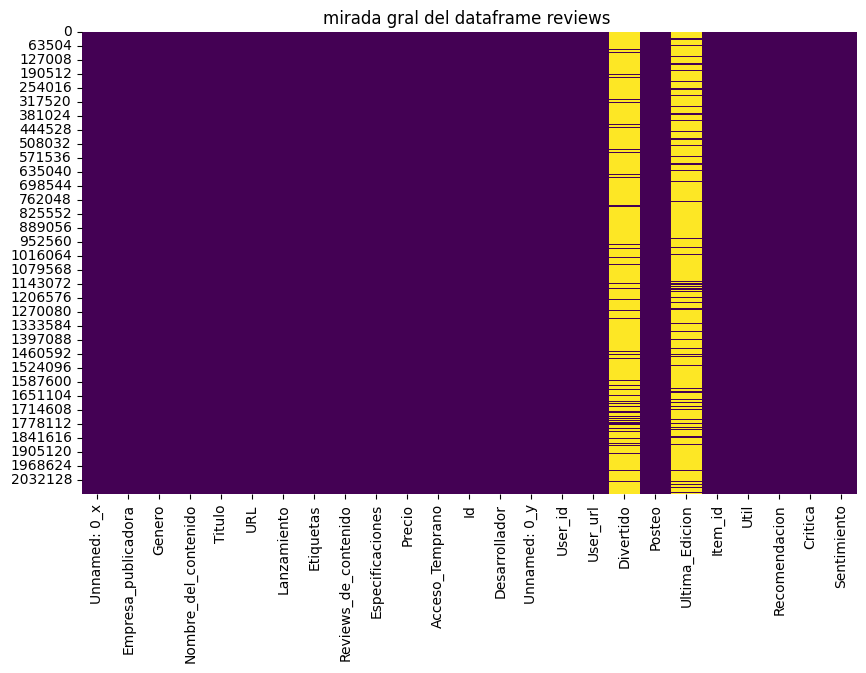

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral del dataframe reviews ')
plt.show()

In [ ]:
merged_data.dropna(inplace=True)

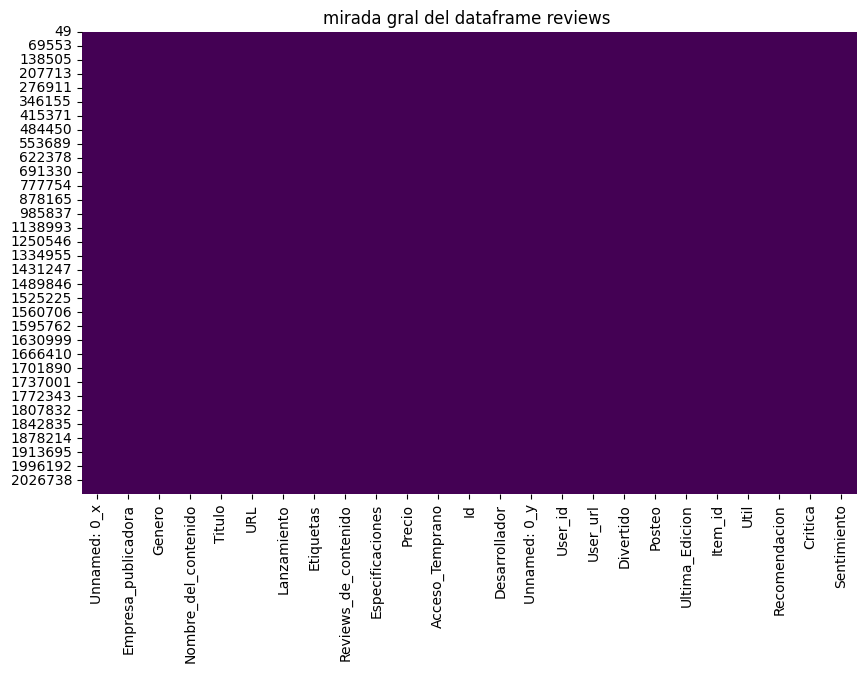

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral del dataframe reviews ')
plt.show()

In [ ]:
merged_data.columns

Index(['Unnamed: 0_x', 'Empresa_publicadora', 'Genero', 'Nombre_del_contenido',
       'Titulo', 'URL', 'Lanzamiento', 'Etiquetas', 'Reviews_de_contenido',
       'Especificaciones', 'Precio', 'Acceso_Temprano', 'Id', 'Desarrollador',
       'Unnamed: 0_y', 'User_id', 'User_url', 'Divertido', 'Posteo',
       'Ultima_Edicion', 'Item_id', 'Util', 'Recomendacion', 'Critica',
       'Sentimiento'],
      dtype='object')

In [ ]:
merged_data = merged_data.drop(columns = ['Unnamed: 0_x', 'Empresa_publicadora', 'Genero', 'Nombre_del_contenido',
       'Titulo', 'URL', 'Etiquetas', 'Reviews_de_contenido',
       'Especificaciones', 'Precio', 'Acceso_Temprano', 'Desarrollador',
       'Unnamed: 0_y', 'User_url', 'Divertido',
       'Ultima_Edicion', 'Util', 'Recomendacion', 'Critica'])

In [ ]:
merged_data.tail(1000)

Lanzamiento      Id            User_id      Posteo  \
2027498 1970-01-01 00:00:00.000002012  209080         ramjamslam  20-12-2014   
2027515 1970-01-01 00:00:00.000002012  209080          adamkupou  25-01-2015   
2027536 1970-01-01 00:00:00.000002012  209080  76561198016761464  19-12-2014   
2027574 1970-01-01 00:00:00.000002012  209080         ramjamslam  20-12-2014   
2027591 1970-01-01 00:00:00.000002012  209080          adamkupou  25-01-2015   
...                               ...     ...                ...         ...   
2074548 1970-01-01 00:00:00.000002003  223470       MrProvidings  17-12-2014   
2074626 1970-01-01 00:00:00.000002003  223470       MrProvidings  17-12-2014   
2074704 1970-01-01 00:00:00.000002003  223470       MrProvidings  17-12-2014   
2074782 1970-01-01 00:00:00.000002003  223470       MrProvidings  17-12-2014   
2074860 1970-01-01 00:00:00.000002003  223470       MrProvidings  17-12-2014   

          Item_id  Sentimiento  
2027498  209080.0          2.0  
2027515  209080.0          2.0  
2027536  209080.0          2.0  
2027574  209080.0          2.0  
2027591  209080.0          2.0  
...           ...          ...  
2074548  223470.0          2.0  
2074626  223470.0          2.0  
2074704  223470.0          2.0  
2074782  223470.0          2.0  
2074860  223470.0          2.0  

[1000 rows x 6 columns]

In [ ]:
contenido_columna = merged_data['Lanzamiento'].head(1000)
print(contenido_columna)


49      1970-01-01 00:00:00.000001998
52      1970-01-01 00:00:00.000001998
105     1970-01-01 00:00:00.000001998
108     1970-01-01 00:00:00.000001998
161     1970-01-01 00:00:00.000001998
                     ...             
65844   1970-01-01 00:00:00.000002006
65861   1970-01-01 00:00:00.000002006
65916   1970-01-01 00:00:00.000002006
65959   1970-01-01 00:00:00.000002006
65963   1970-01-01 00:00:00.000002006
Name: Lanzamiento, Length: 1000, dtype: datetime64[ns]


# **EDA - Analisis Exploratorio de Datos- Steam Games**

**Búsqueda de Valores Faltantes**

**[Verifacion de elementos Nulos en steam_games.json.gz](https://)**

<function matplotlib.pyplot.show(close=None, block=None)>

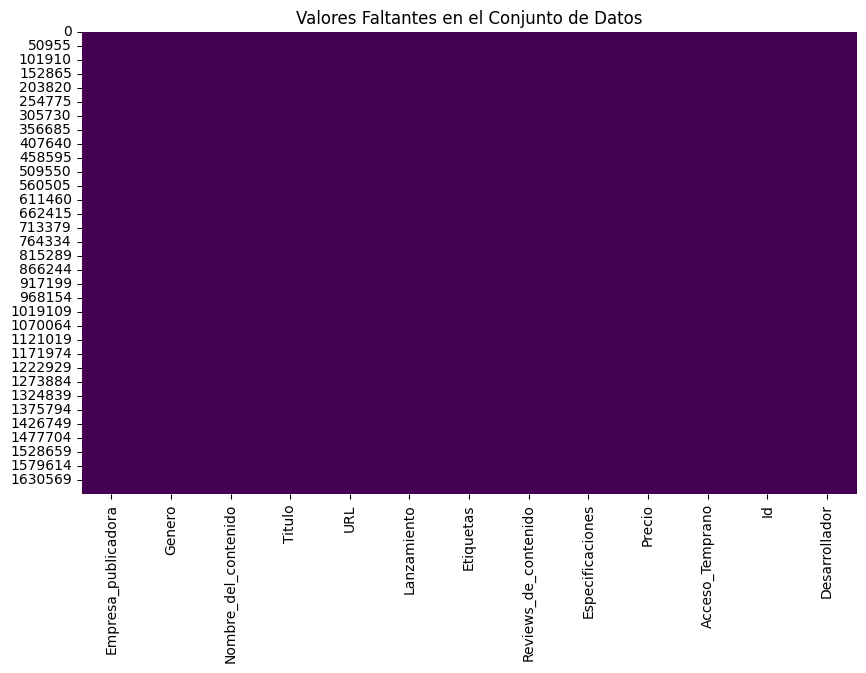

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral_eda.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el Conjunto de Datos')
plt.show

**[Verifacion de elementos Nulos en user_items.json.gz](https://)**

<function matplotlib.pyplot.show(close=None, block=None)>

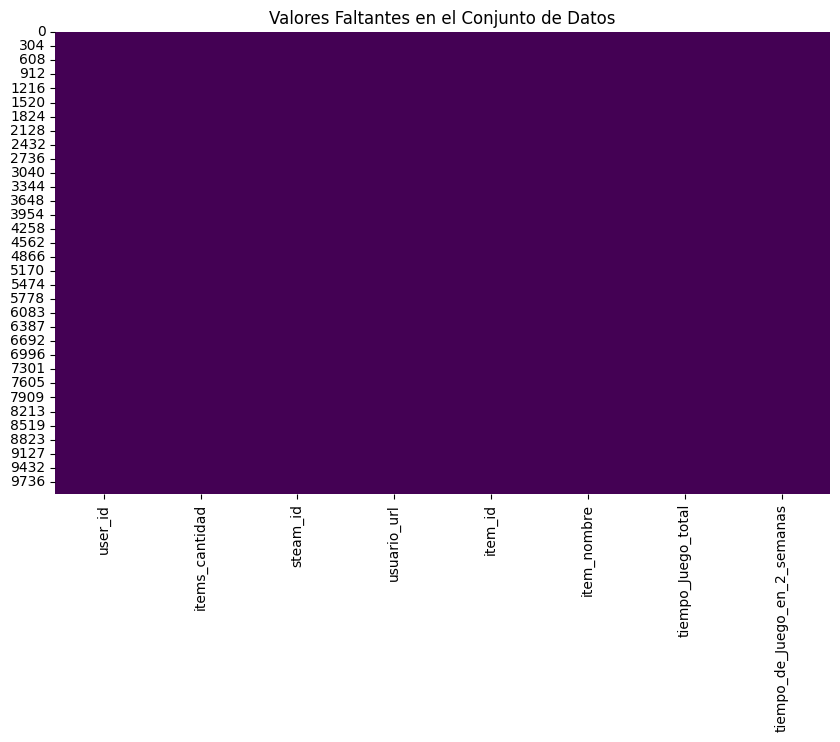

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el Conjunto de Datos')
plt.show

**Exploración de Variables Categoricas de Steam games**

**Empresas Publicadoras**

In [ ]:
df_gral_eda.head(1)

Empresa_publicadora  Genero Nombre_del_contenido               Titulo  \
0           Kotoshiro  Action  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 URL  Lanzamiento Etiquetas  \
0  http://store.steampowered.com/app/761140/Lost_...         2018  Strategy   

                                Reviews_de_contenido Especificaciones Precio  \
0  http://steamcommunity.com/app/761140/reviews/?...    Single-player   4.99   

  Acceso_Temprano      Id Desarrollador  
0           False  761140     Kotoshiro

In [ ]:
df_gral_eda.shape

(1681511, 13)

In [ ]:
Muestra1= df_gral_eda[0:1000]

In [ ]:
Muestra2 = df_gral_eda[1000:2000]

In [ ]:
Muestra3 = df_gral_eda[2000:3000]

In [ ]:
Muestra4 = df_gral_eda[20000:21000]

In [ ]:
len(df_gral_eda['Empresa_publicadora'].unique())

7834

In [ ]:
df_gral_eda['Empresa_publicadora'].unique().tolist()

['Kotoshiro',
 'Making Fun, Inc.',
 'Poolians.com',
 '彼岸领域',
 'Trickjump Games Ltd',
 'Poppermost Productions',
 'Stegalosaurus Game Development',
 'Copperpick Studio',
 'Ghulam Jewel',
 'Apillo',
 'Tero Lunkka',
 'FrozenPepper',
 'Casey Labrack',
 'Stainless Games Ltd',
 'Valve',
 'dev4play',
 'ETGgames',
 'Cisamid Inc.',
 'Strategy First',
 'Blazing Griffin Ltd.',
 'Ultraint',
 'TPM.CO SOFT WORKS',
 'Wonderbox Games',
 'Mad Unicorn Games',
 'Majesco',
 'Introversion Software',
 'SimBin',
 'Unknown Worlds Entertainment',
 'CINEMAX, s.r.o.',
 'Funcom',
 'Capcom',
 '2K Games',
 'Arkane Studios',
 '2K Games, Feral Interactive (Mac)',
 'Square Enix, Feral Interactive (Mac)',
 'Telltale Games',
 'id Software',
 'THQ Nordic',
 'SEGA',
 'Big Fish Games',
 'Rockstar Games',
 'Square Enix',
 'Electronic Arts',
 'D3Publisher of America, Inc.',
 'ValuSoft, Retroism',
 'Bohemia Interactive',
 '1C Company',
 'Atari',
 'Atari, Aspyr (Mac)',
 'Epic Games, Inc.',
 'Nunchuck Games',
 'Ubisoft',
 'Last

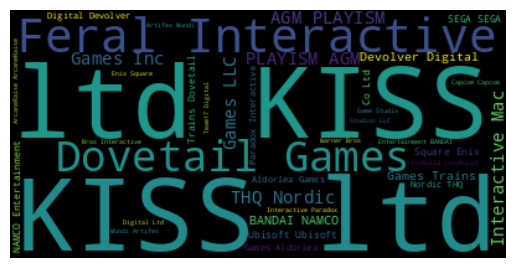

In [ ]:
# Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Convertimos todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(review) for review in df_gral_eda.Empresa_publicadora)

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 24444 (\N{CJK UNIFIED IDEOGRAPH-5F7C}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 23736 (\N{CJK UNIFIED IDEOGRAPH-5CB8}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 39046 (\N{CJK UNIFIED IDEOGRAPH-9886}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 22495 (\N{CJK UNIFIED IDEOGRAPH-57DF}) missing from current font.



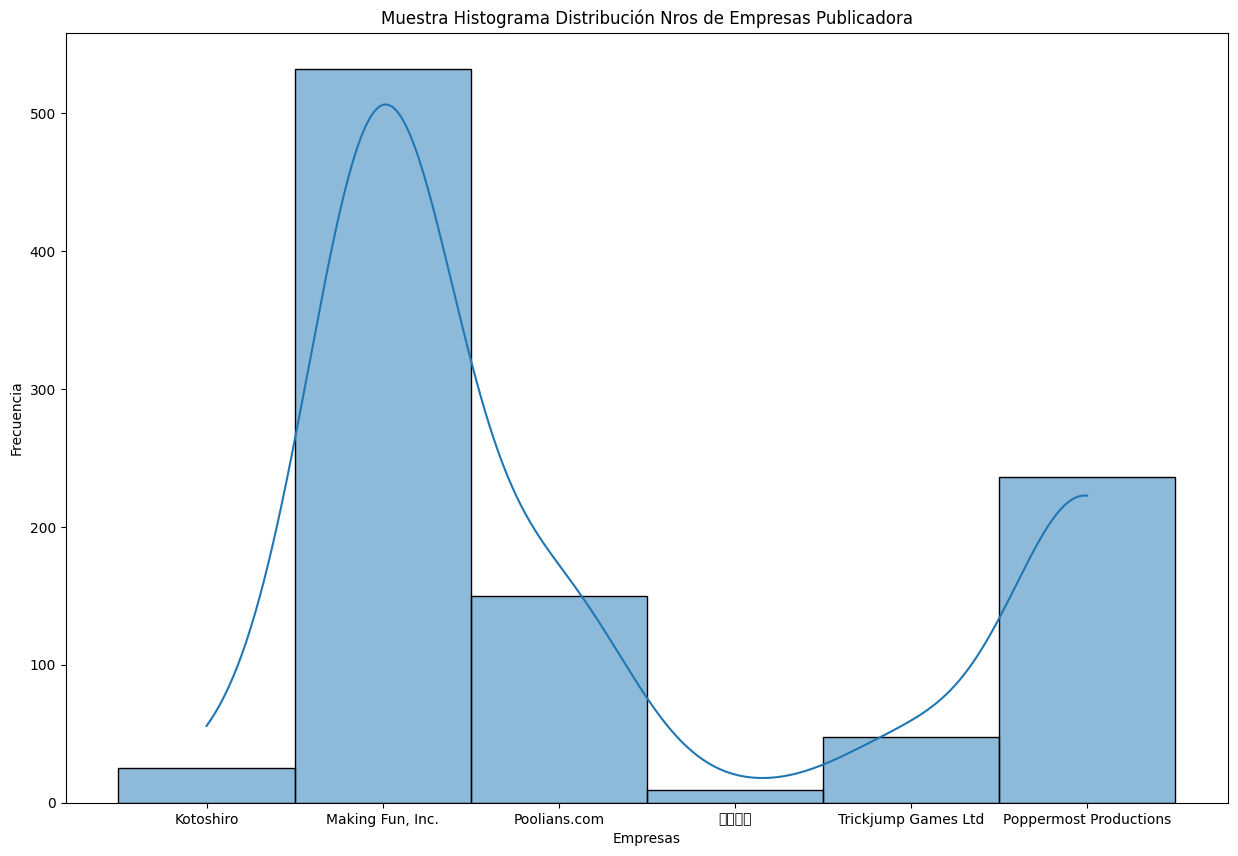

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(Muestra1['Empresa_publicadora'], bins=20, kde=True)
plt.xlabel('Empresas')
plt.ylabel('Frecuencia')
plt.title('Muestra Histograma Distribución Nros de Empresas Publicadora')
plt.show()

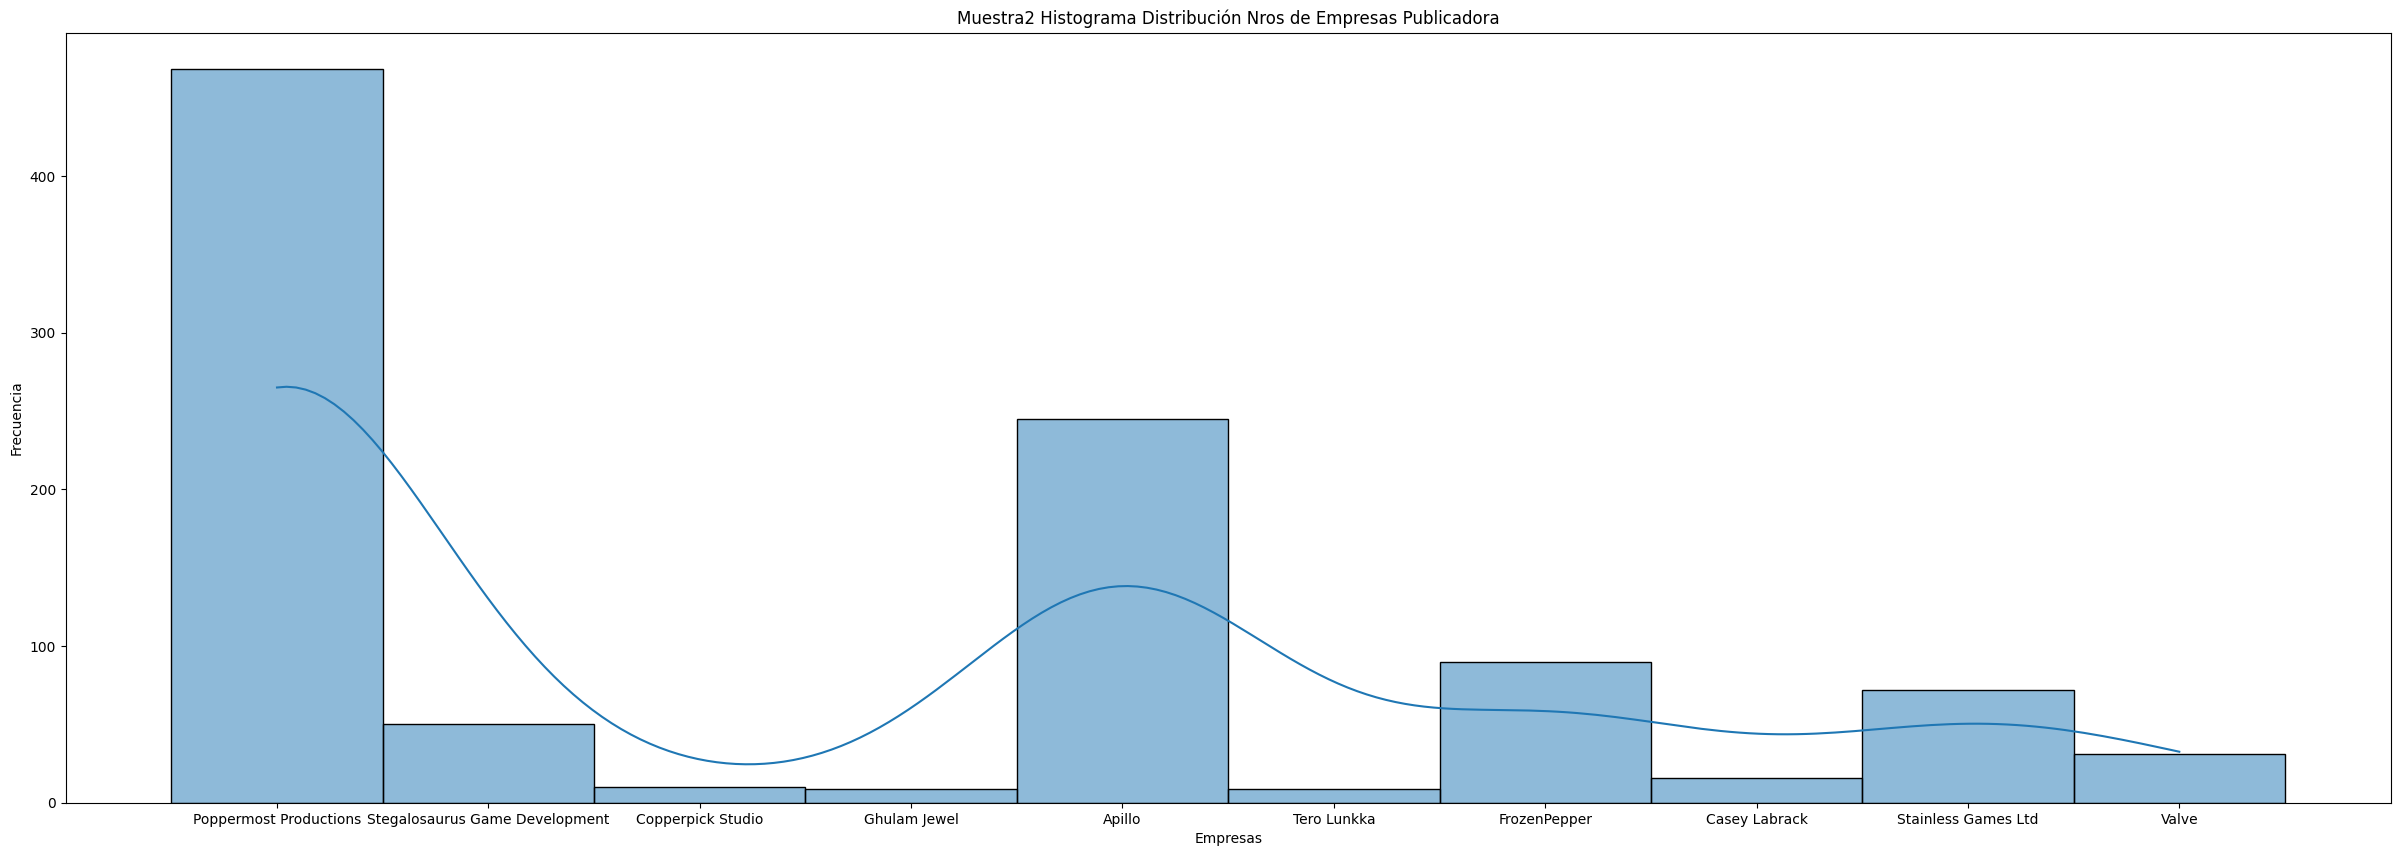

In [ ]:
plt.figure(figsize=(30, 10))
sns.histplot(Muestra2['Empresa_publicadora'], bins=20, kde=True)
plt.xlabel('Empresas')
plt.ylabel('Frecuencia')
plt.title('Muestra2 Histograma Distribución Nros de Empresas Publicadora')
plt.show()

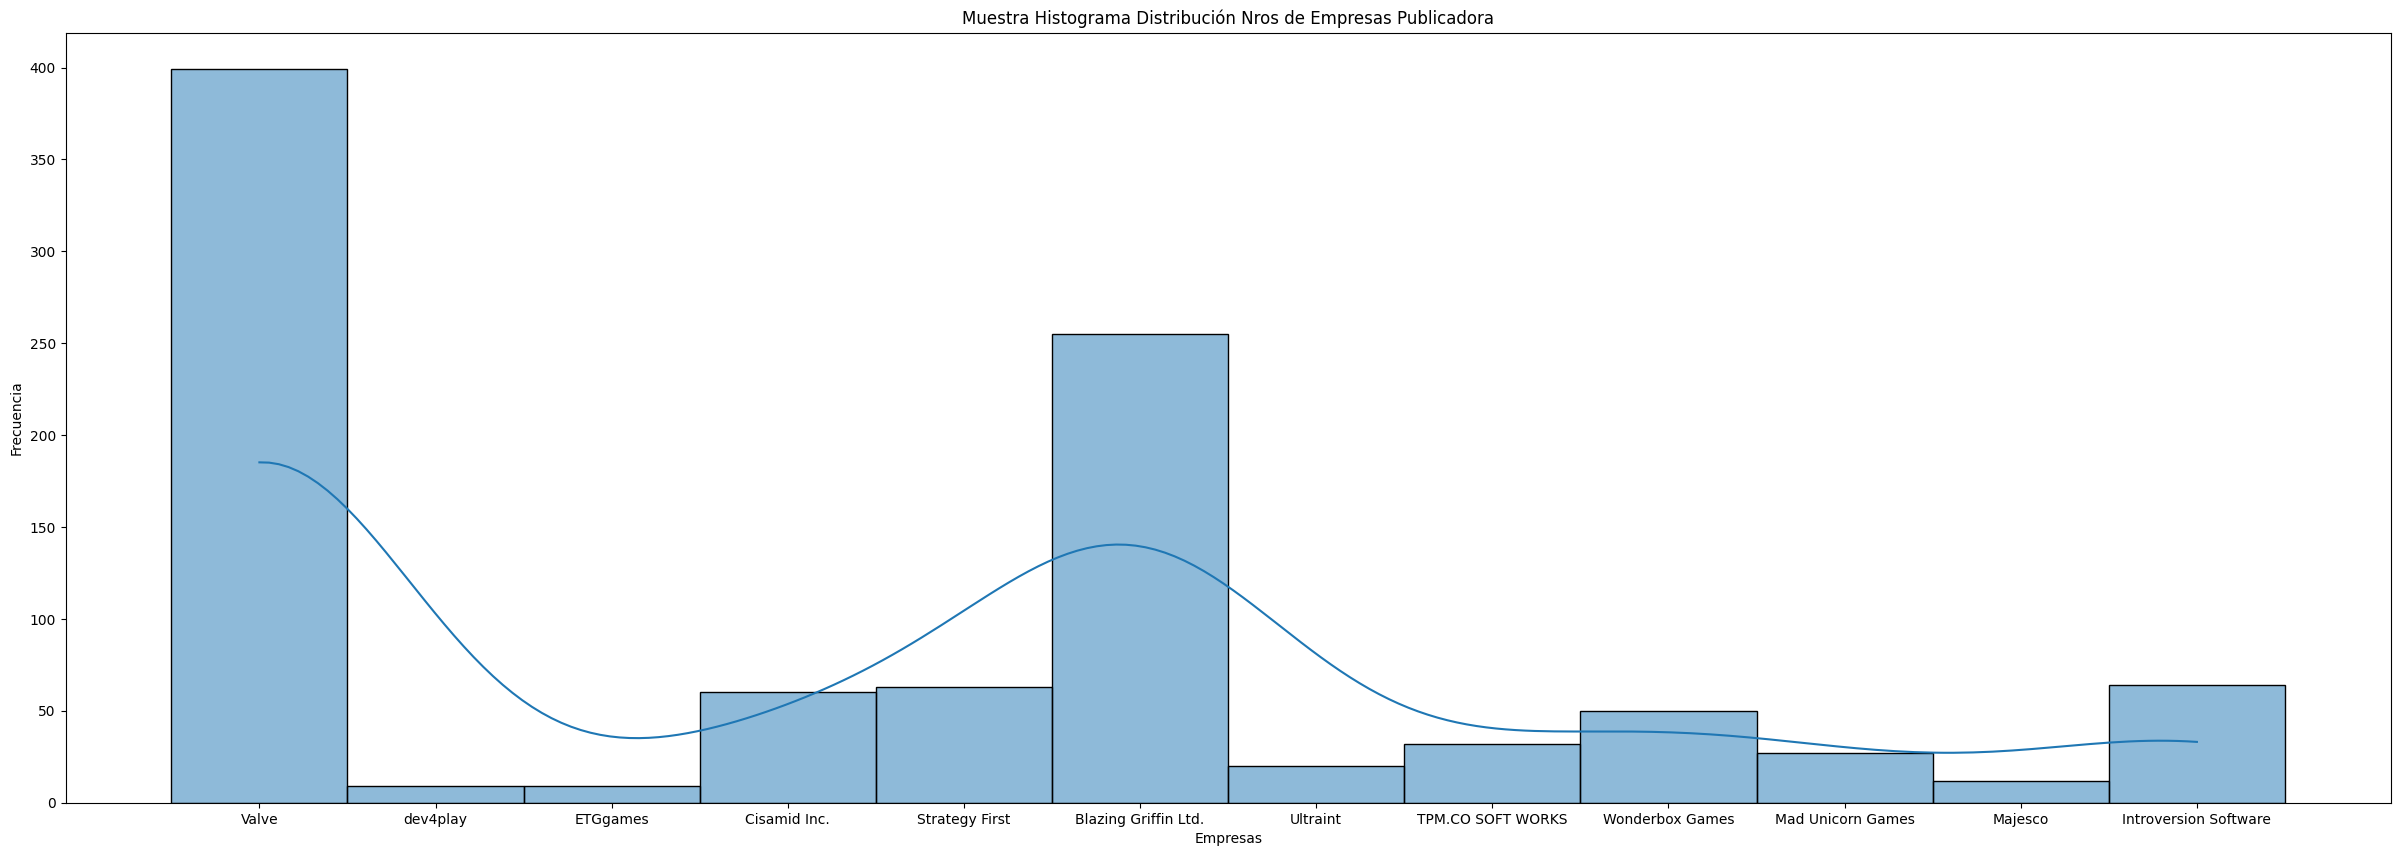

In [ ]:
plt.figure(figsize=(30, 10))
sns.histplot(Muestra3['Empresa_publicadora'], bins=20, kde=True)
plt.xlabel('Empresas')
plt.ylabel('Frecuencia')
plt.title('Muestra Histograma Distribución Nros de Empresas Publicadora')
plt.show()

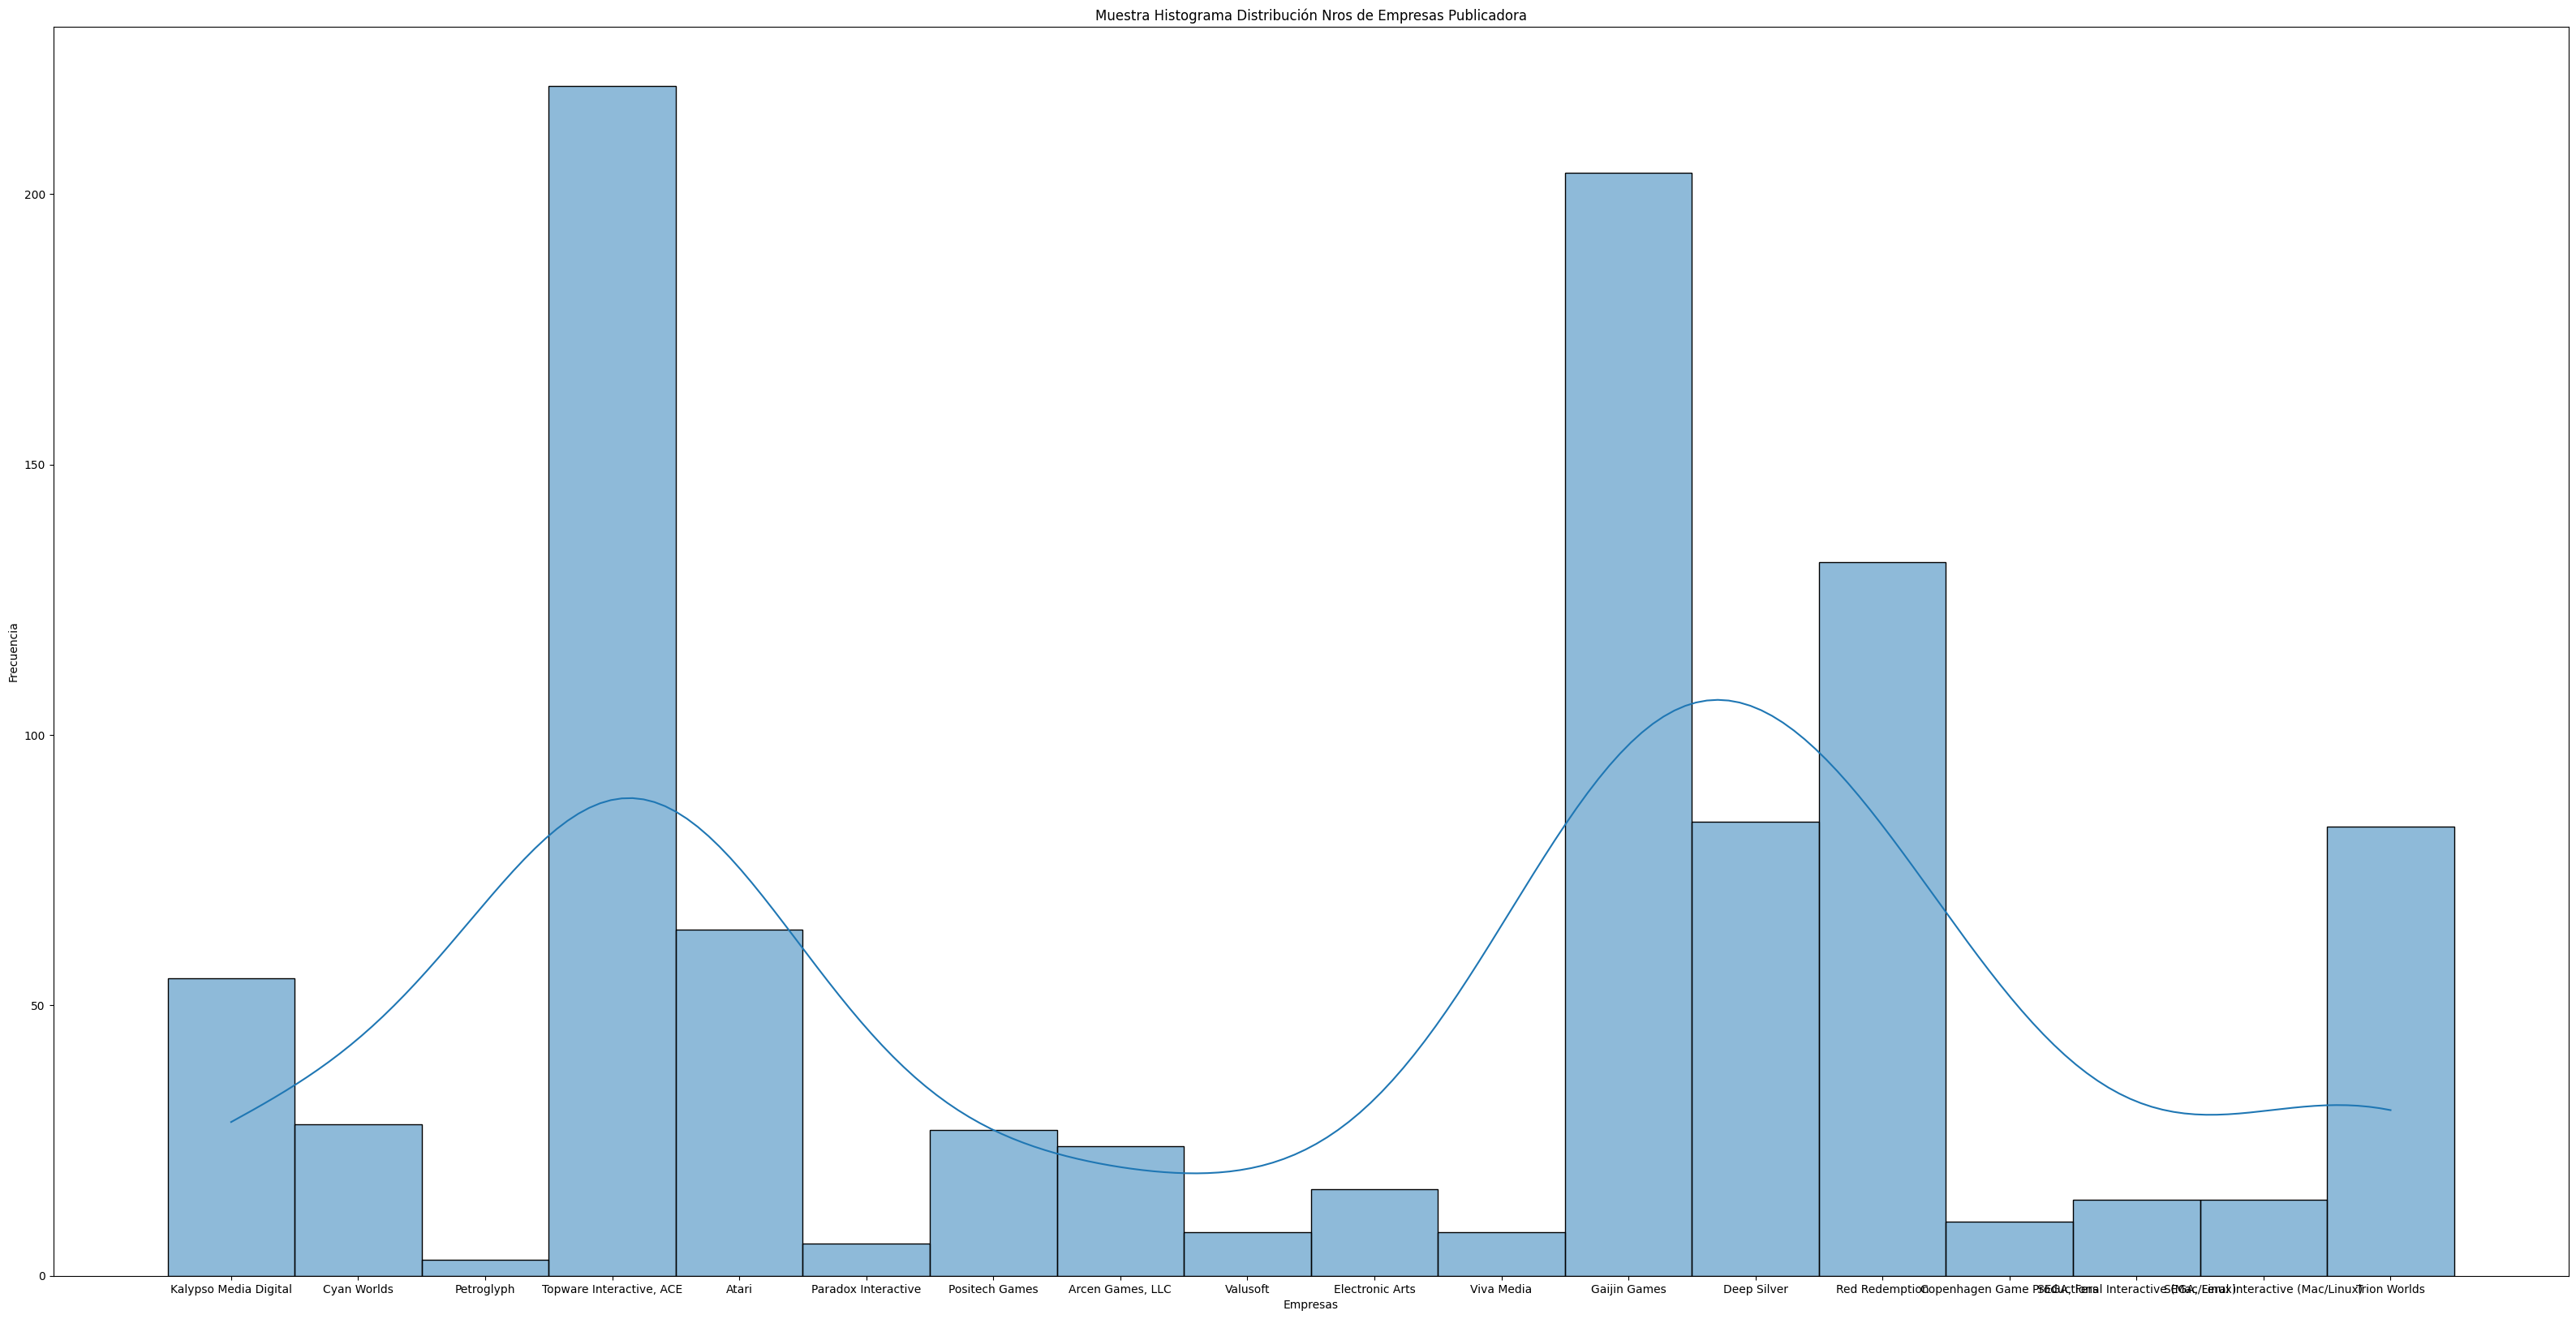

In [ ]:
plt.figure(figsize=(40, 20))
sns.histplot(Muestra4['Empresa_publicadora'], bins=20, kde=True)
plt.xlabel('Empresas')
plt.ylabel('Frecuencia')
plt.title('Muestra Histograma Distribución Nros de Empresas Publicadora')
plt.show()

**Genero**

In [ ]:
len(df_gral_eda['Genero'].unique())

21

In [ ]:
df_gral_eda['Genero'].unique().tolist()

['Action',
 'Casual',
 'Indie',
 'Simulation',
 'Strategy',
 'Free to Play',
 'RPG',
 'Sports',
 'Adventure',
 'Racing',
 'Early Access',
 'Massively Multiplayer',
 'Animation &amp; Modeling',
 'Web Publishing',
 'Education',
 'Software Training',
 'Utilities',
 'Design &amp; Illustration',
 'Audio Production',
 'Video Production',
 'Photo Editing']

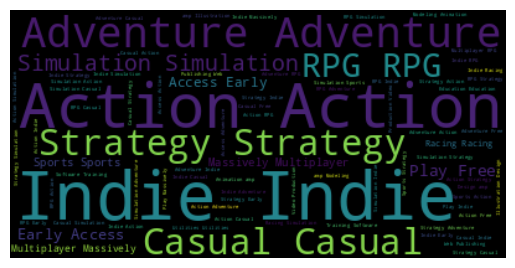

In [ ]:
# Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Convertimos todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(review) for review in df_gral_eda.Genero)

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

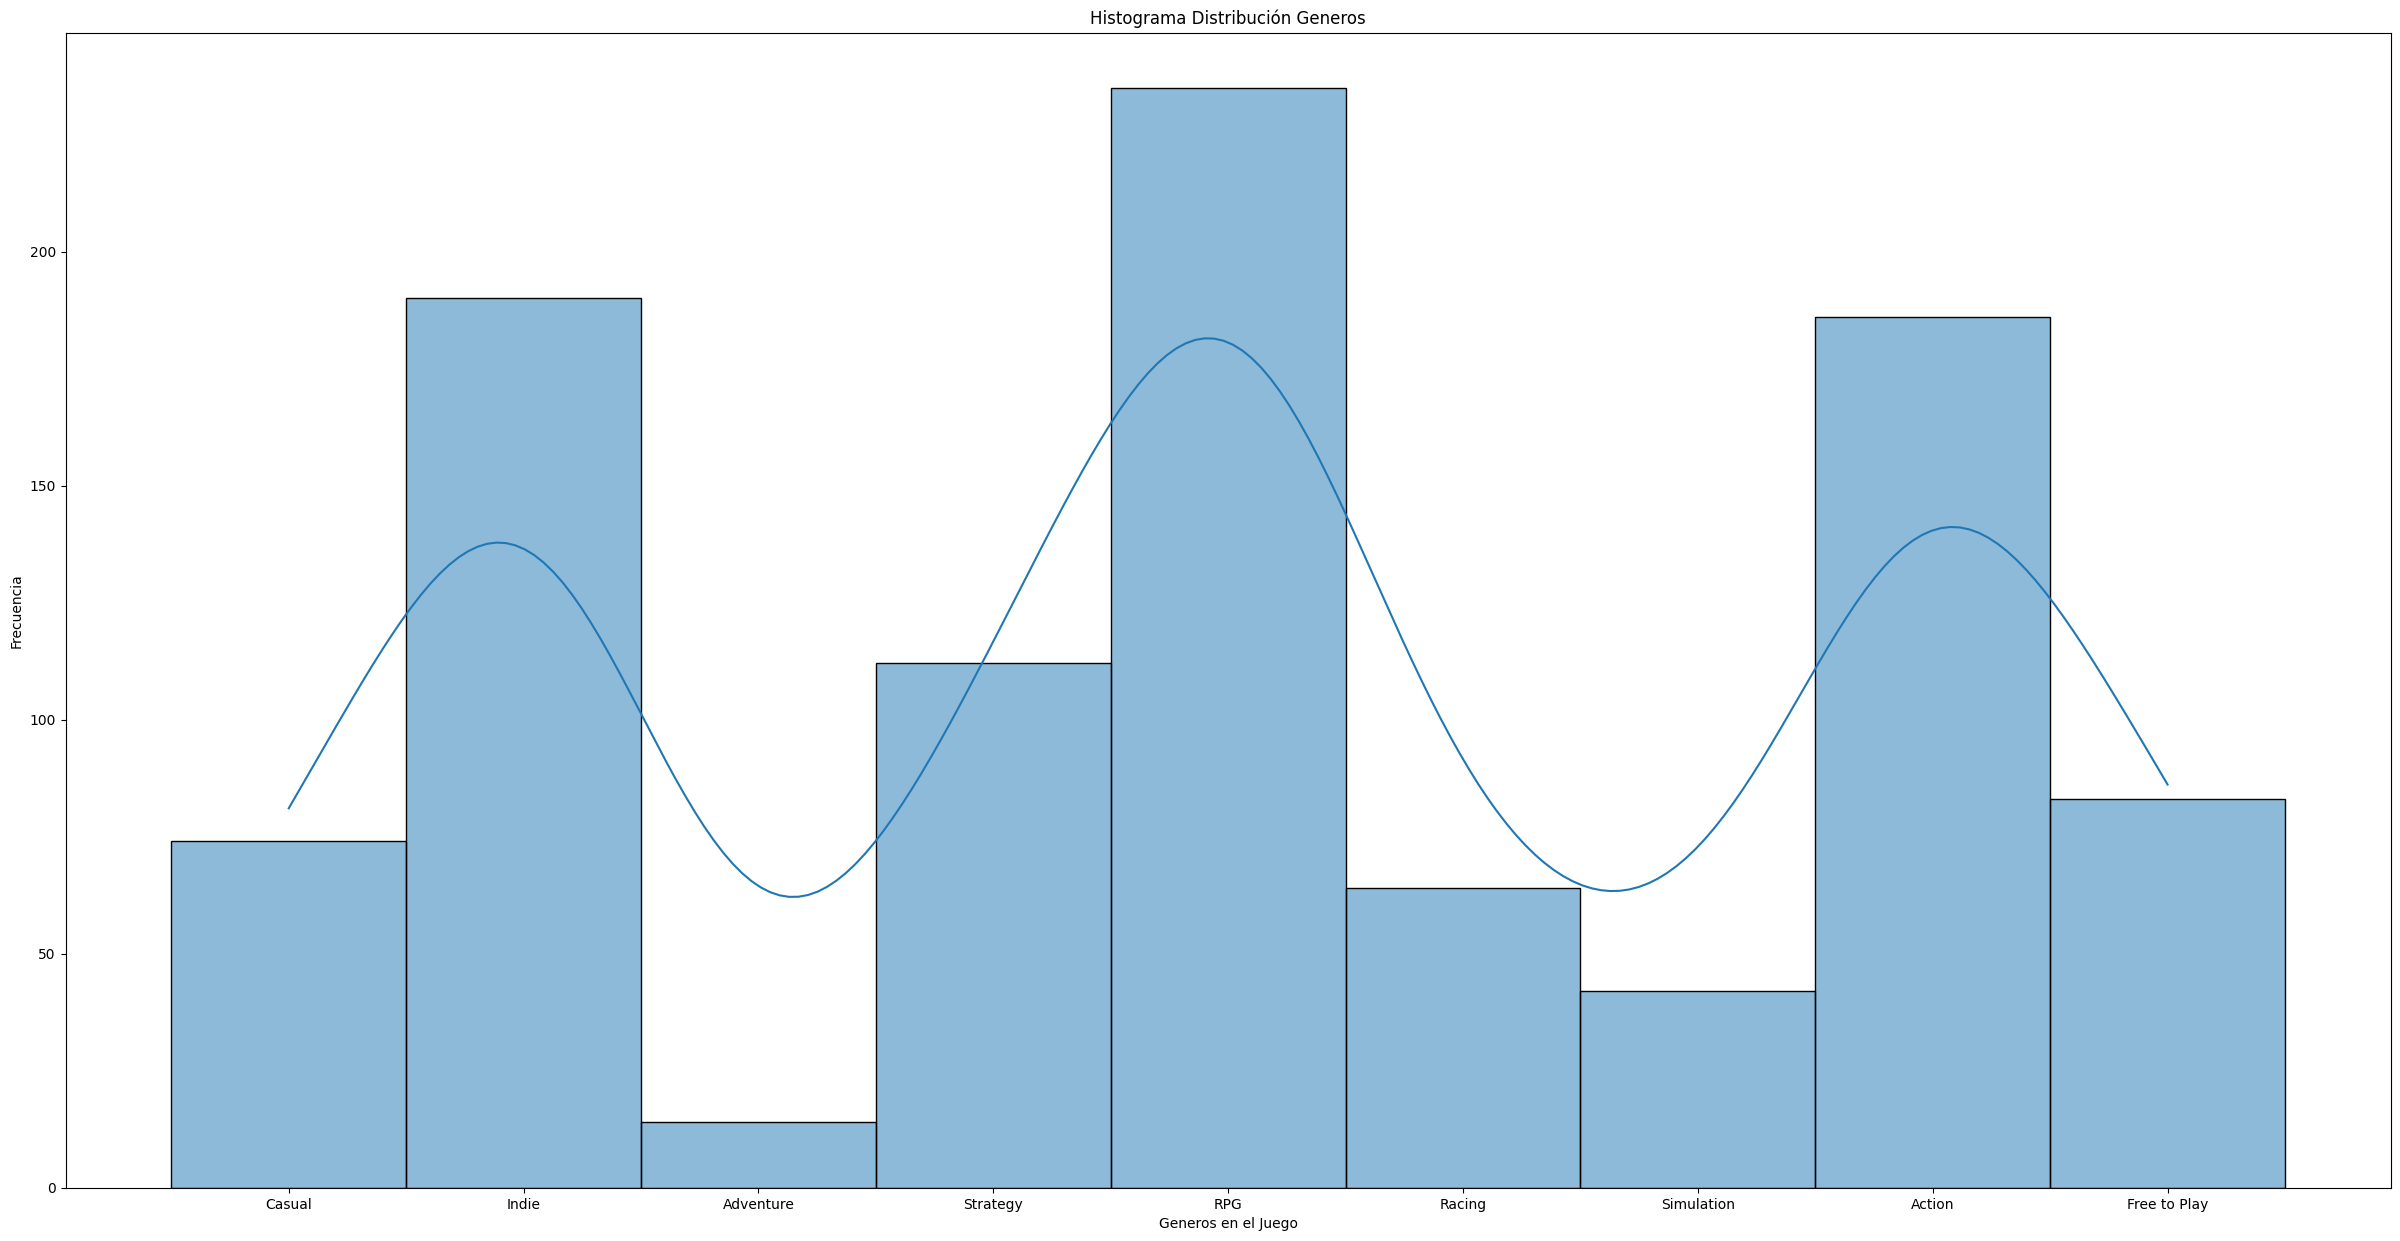

In [ ]:
plt.figure(figsize=(30, 15))
sns.histplot(Muestra4['Genero'], bins=50, kde=True)
plt.xlabel('Generos en el Juego')
plt.ylabel('Frecuencia')
plt.title('Histograma Distribución Generos')
plt.show()

**Nombre del Contenido**

In [ ]:
len(df_gral_eda['Nombre_del_contenido'].unique())

22511

In [ ]:
Muestra1= df_gral[0:1000]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 24377 (\N{CJK UNIFIED IDEOGRAPH-5F39}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 28856 (\N{CJK UNIFIED IDEOGRAPH-70B8}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.



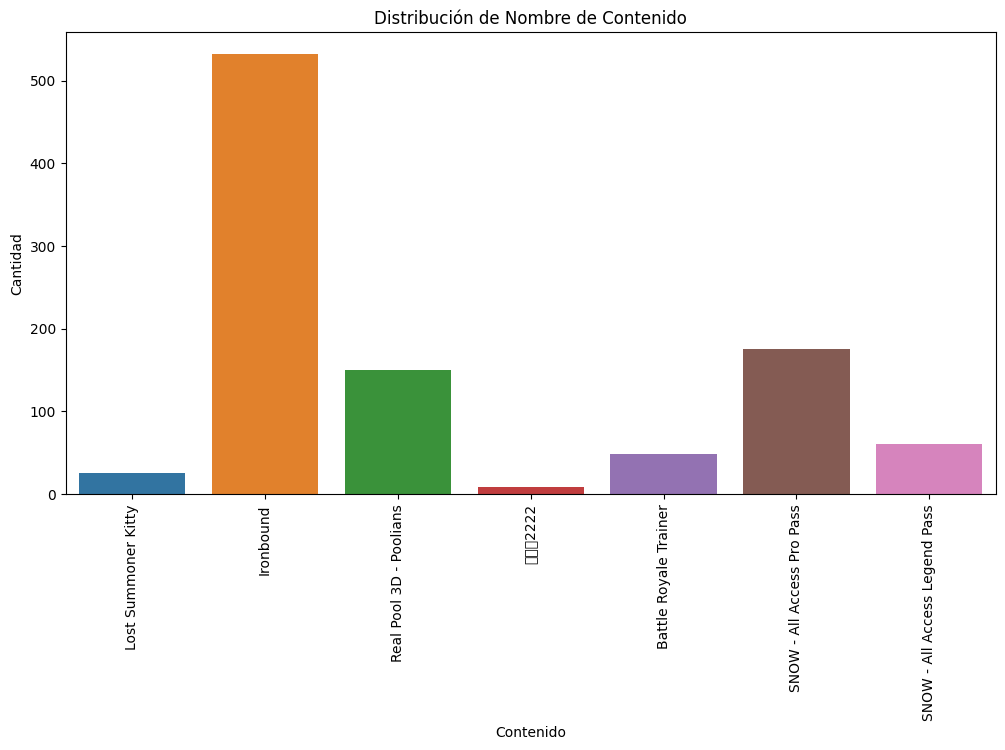

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Muestra1, x='Nombre_del_contenido')
plt.xticks(rotation=90)
plt.xlabel('Contenido')
plt.ylabel('Cantidad')
plt.title('Distribución de Nombre de Contenido')
plt.show()

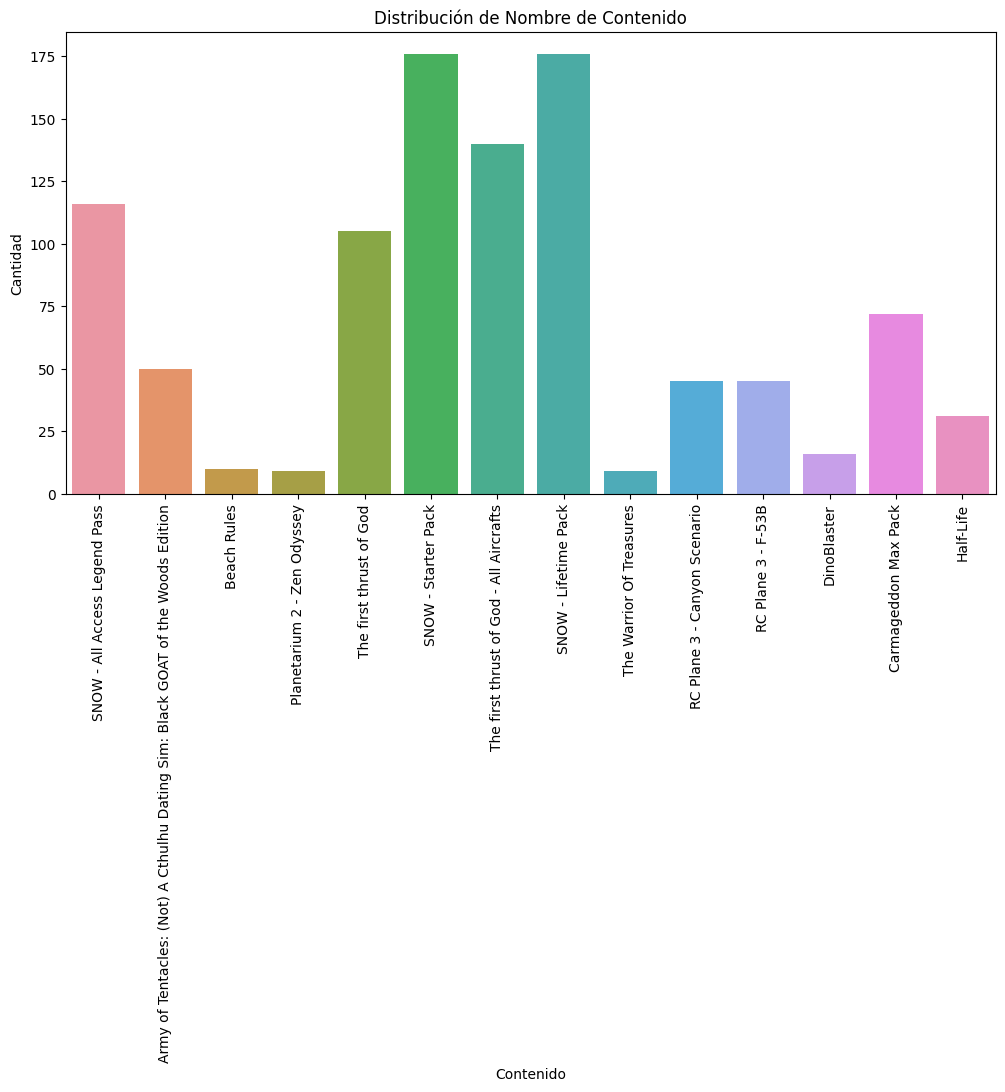

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Muestra2, x='Nombre_del_contenido')
plt.xticks(rotation=90)
plt.xlabel('Contenido')
plt.ylabel('Cantidad')
plt.title('Distribución de Nombre de Contenido')
plt.show()

**Etiquetas**

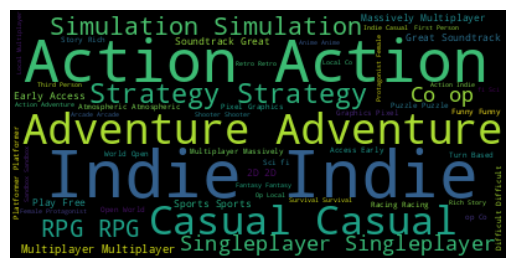

In [ ]:
# Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Convertimos todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(review) for review in df_gral_eda.Etiquetas)

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Desarrollador**

In [ ]:
len(df_gral_eda['Desarrollador'].unique())

10275

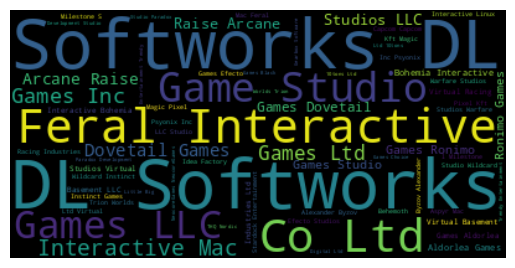

In [ ]:
# Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Convertimos todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(review) for review in df_gral_eda.Desarrollador)

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 24444 (\N{CJK UNIFIED IDEOGRAPH-5F7C}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 23736 (\N{CJK UNIFIED IDEOGRAPH-5CB8}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 39046 (\N{CJK UNIFIED IDEOGRAPH-9886}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 22495 (\N{CJK UNIFIED IDEOGRAPH-57DF}) missing from current font.



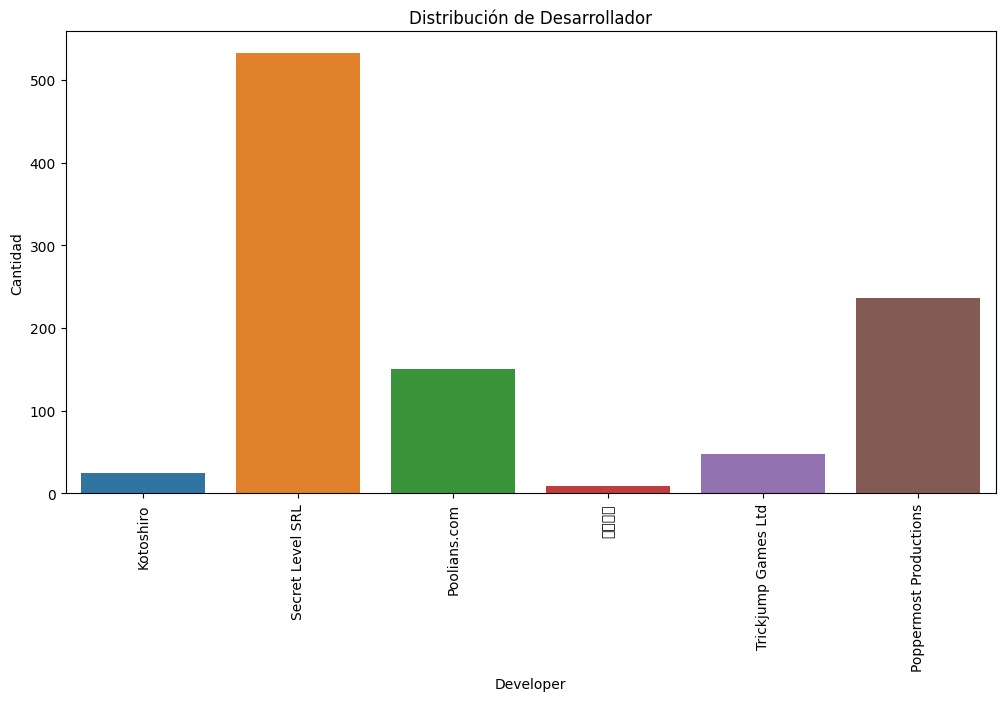

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Muestra1, x='Desarrollador')
plt.xticks(rotation=90)
plt.xlabel('Developer')
plt.ylabel('Cantidad')
plt.title('Distribución de Desarrollador')
plt.show()

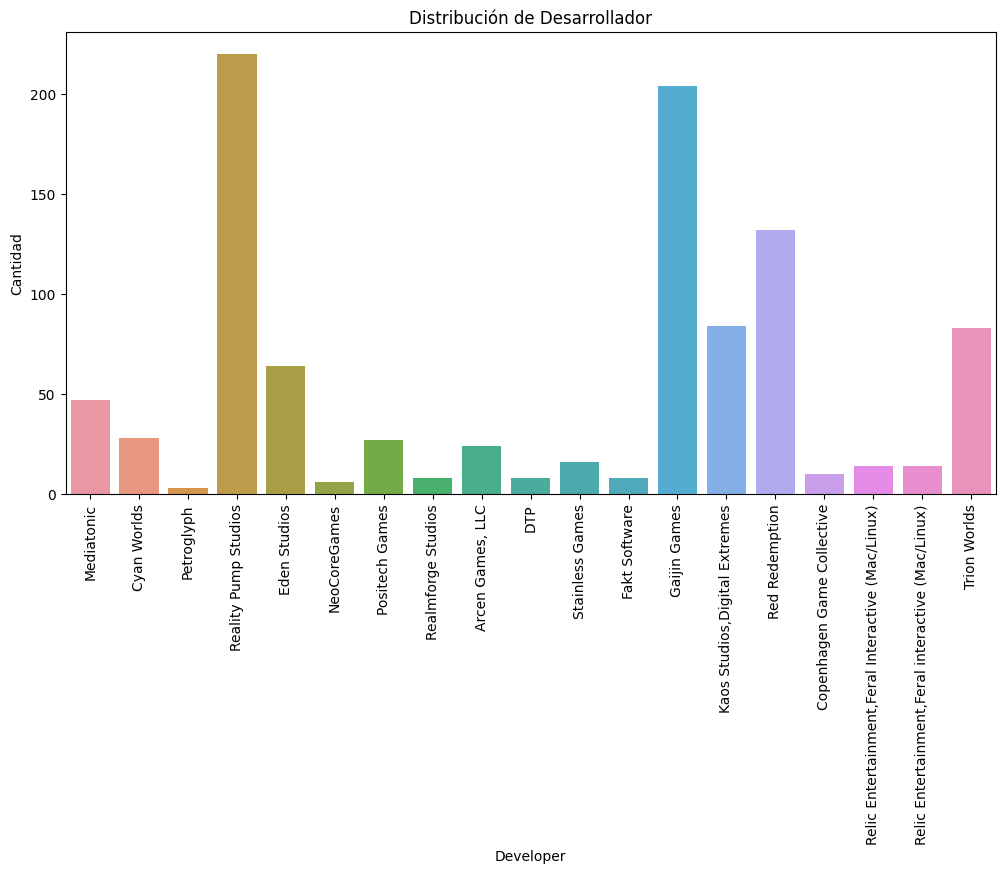

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Muestra4, x='Desarrollador')
plt.xticks(rotation=90)
plt.xlabel('Developer')
plt.ylabel('Cantidad')
plt.title('Distribución de Desarrollador')
plt.show()

# **EDA - Analisis Exploratorio de Datos- User Review**

In [ ]:
df_eda.head(2)

User_id                                           User_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   

  Divertido                    Posteo Ultima_Edicion Item_id            Util  \
0            Posted November 5, 2011.                   1250  No ratings yet   
0               Posted July 15, 2011.                  22200  No ratings yet   

  Recomendacion                                            Critica  
0          True  Simple yet with great replayability. In my opi...  
0          True               It's unique and worth a playthrough.

In [ ]:
df_eda.shape

(59333, 9)

In [ ]:
Muestra_reviews1= df_eda[0:100]

In [ ]:
Muestra_reviews2 = df_eda[100:200]

In [ ]:
Muestra_reviews3 = df_eda[300:400]

**[Verifacion de elementos Nulos en user_reviews.json.gz](https://)**

<function matplotlib.pyplot.show(close=None, block=None)>

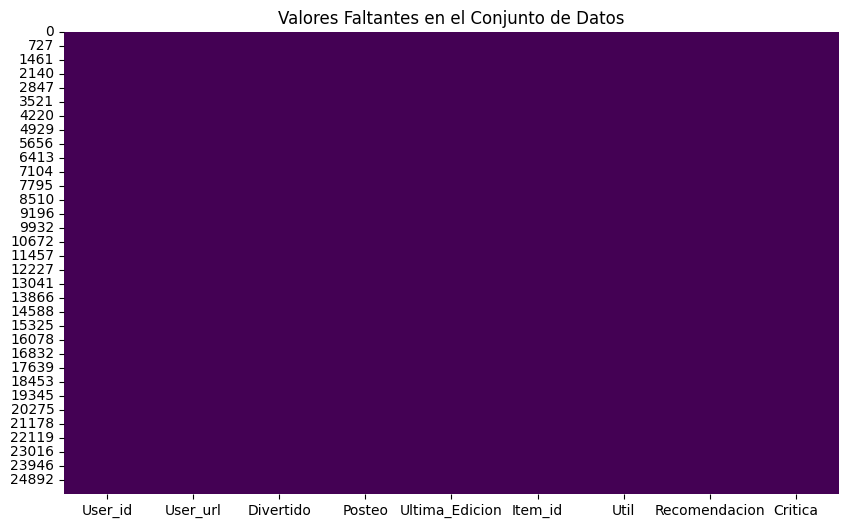

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_eda.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el Conjunto de Datos')
plt.show

**Analisis de Variables Numericas y categoricas**

In [ ]:
df_eda['Divertido'].unique().tolist()

['',
 '3 people found this review funny',
 '1 person found this review funny',
 '2 people found this review funny',
 '5 people found this review funny',
 '17 people found this review funny',
 nan,
 '524 people found this review funny',
 '4 people found this review funny',
 '12 people found this review funny',
 '6 people found this review funny',
 '7 people found this review funny',
 '103 people found this review funny',
 '16 people found this review funny',
 '34 people found this review funny',
 '9 people found this review funny',
 '45 people found this review funny',
 '11 people found this review funny',
 '97 people found this review funny',
 '207 people found this review funny',
 '718 people found this review funny',
 '23 people found this review funny',
 '100 people found this review funny',
 '8 people found this review funny',
 '19 people found this review funny',
 '32 people found this review funny',
 '118 people found this review funny',
 '10 people found this review funny',
 '44

In [ ]:
len(df_eda['Divertido'].unique())

187

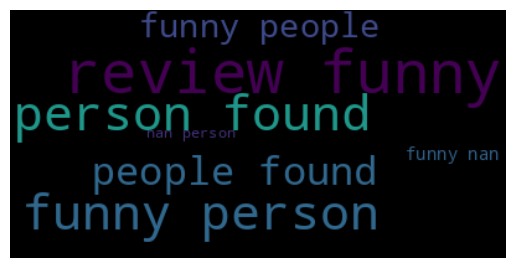

In [ ]:
# Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Convertimos todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(review) for review in df_eda.Divertido)

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**User_id**

In [ ]:
len(df_eda['User_id'].unique())

25485

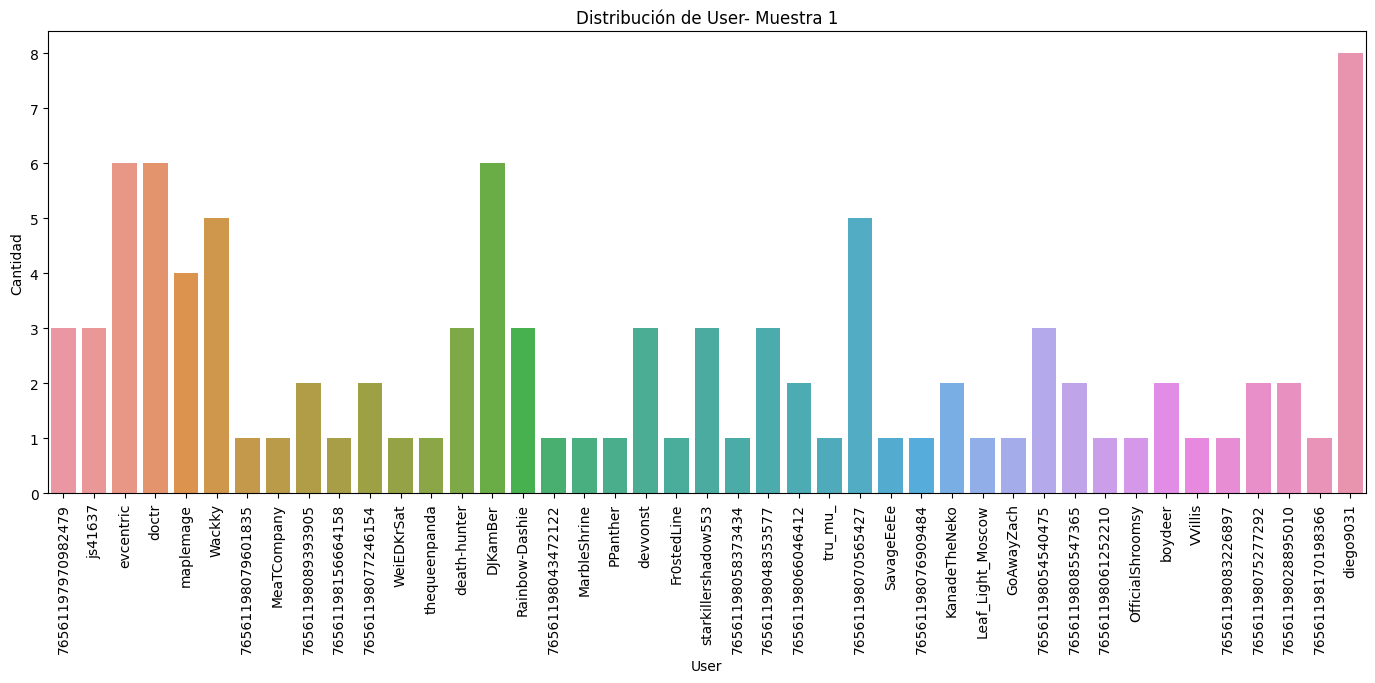

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=Muestra_reviews1, x='User_id')
plt.xticks(rotation=90)
plt.xlabel('User')
plt.ylabel('Cantidad')
plt.title('Distribución de User- Muestra 1')
plt.show()

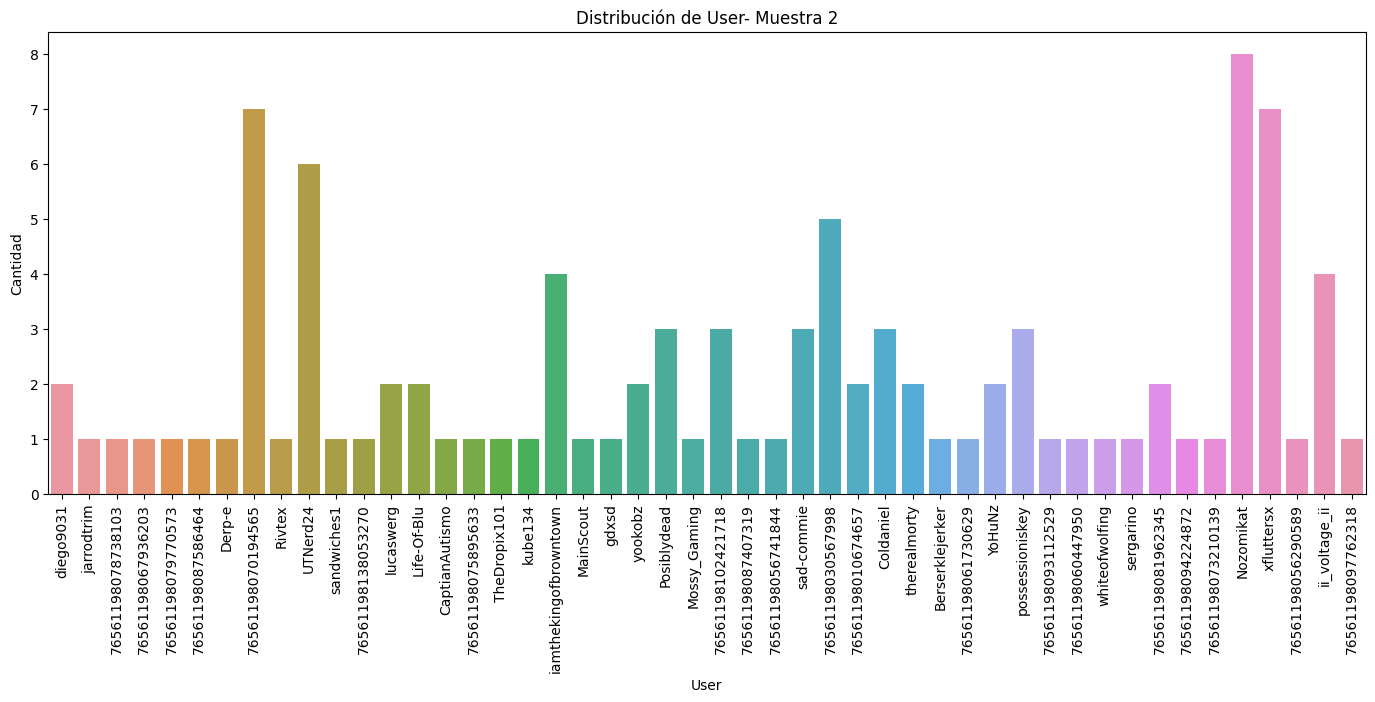

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=Muestra_reviews2, x='User_id')
plt.xticks(rotation=90)
plt.xlabel('User')
plt.ylabel('Cantidad')
plt.title('Distribución de User- Muestra 2')
plt.show()

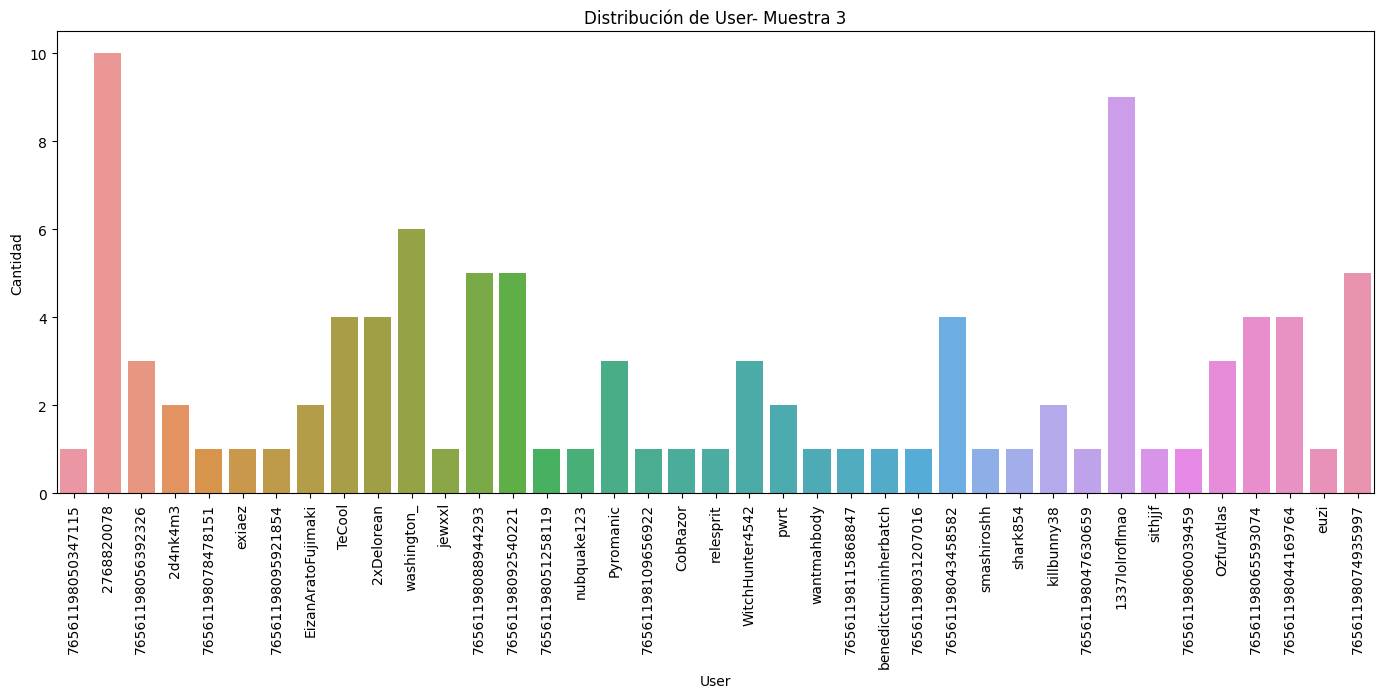

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=Muestra_reviews3, x='User_id')
plt.xticks(rotation=90)
plt.xlabel('User')
plt.ylabel('Cantidad')
plt.title('Distribución de User- Muestra 3')
plt.show()

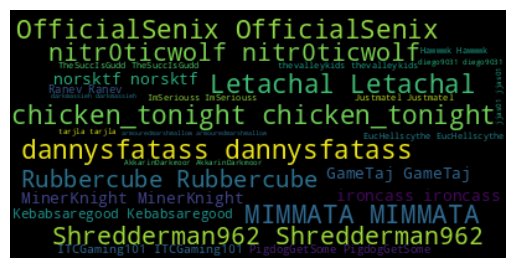

In [ ]:
# Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Convertimos todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(User_id) for User_id in df_eda.User_id)

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Recomendacion**

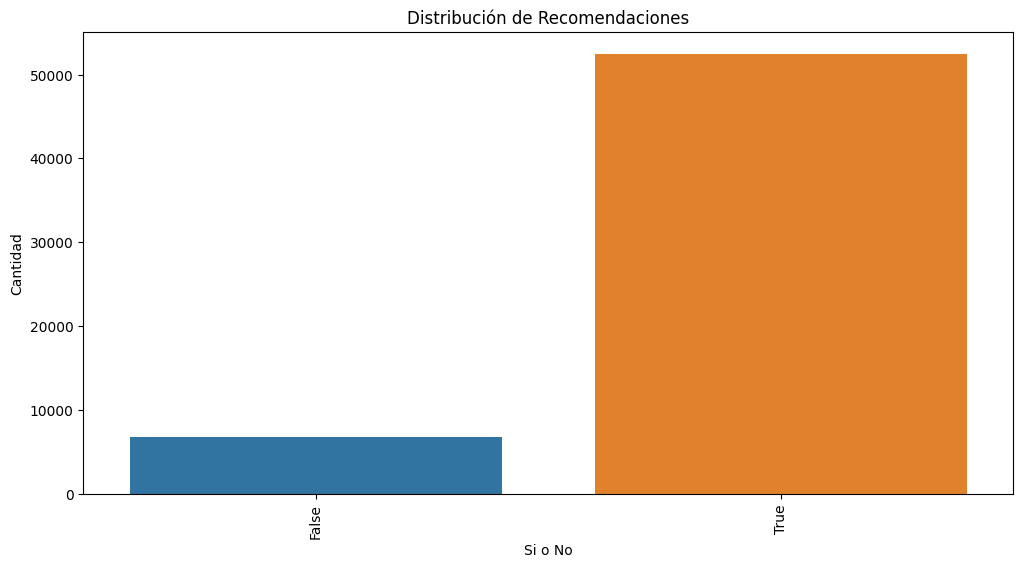

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_eda, x='Recomendacion')
plt.xticks(rotation=90)
plt.xlabel('Si o No')
plt.ylabel('Cantidad')
plt.title('Distribución de Recomendaciones')
plt.show()

# **EDA- Analisis Exploratorio de Datos - Users_Items**

In [ ]:
df2.head(2)

user_id  items_cantidad           steam_id  \
0  76561197970982479             277  76561197970982479   
1  76561197970982479             277  76561197970982479   

                                         usuario_url item_id  \
0  http://steamcommunity.com/profiles/76561197970...      10   
1  http://steamcommunity.com/profiles/76561197970...      20   

             item_nombre  tiempo_Juego_total  tiempo_de_Juego_en_2_semanas  
0         Counter-Strike                 6.0                           0.0  
1  Team Fortress Classic                 0.0                           0.0

In [ ]:
df2.shape

(10000, 8)

**Analisis de variable numerica y categorica**

In [ ]:
len(df2['items_cantidad'].unique())

72

In [ ]:
df2['items_cantidad'].unique().tolist()

[277,
 888,
 137,
 328,
 541,
 371,
 304,
 258,
 629,
 115,
 71,
 253,
 55,
 14,
 103,
 59,
 174,
 33,
 28,
 524,
 121,
 96,
 152,
 12,
 99,
 88,
 185,
 43,
 77,
 50,
 62,
 196,
 68,
 49,
 95,
 32,
 48,
 75,
 11,
 10,
 73,
 5,
 6,
 106,
 65,
 25,
 51,
 7,
 81,
 13,
 78,
 56,
 72,
 149,
 74,
 168,
 20,
 64,
 190,
 27,
 200,
 41,
 26,
 161,
 46,
 30,
 34,
 31,
 18,
 214,
 188,
 172]

In [ ]:
muestra_items1= df2[0:10]

**item_nombre**

In [ ]:
len(df2['item_nombre'].unique())

2740

In [ ]:
df2['item_nombre'].unique().tolist()

['Counter-Strike',
 'Team Fortress Classic',
 'Day of Defeat',
 'Deathmatch Classic',
 'Half-Life: Opposing Force',
 'Ricochet',
 'Half-Life',
 'Half-Life: Blue Shift',
 'Day of Defeat: Source',
 'Counter-Strike: Source',
 'Psychonauts',
 'Call of Duty 2',
 "Sid Meier's Civilization IV",
 "Sid Meier's Pirates!",
 'Joint Task Force',
 'Deus Ex: Game of the Year Edition',
 'BioShock',
 'BioShock Remastered',
 'Half-Life 2',
 'Half-Life 2: Deathmatch',
 'Half-Life 2: Lost Coast',
 'Half-Life Deathmatch: Source',
 'Half-Life 2: Episode One',
 'Portal',
 'Half-Life 2: Episode Two',
 'Company of Heroes: Opposing Fronts',
 'Company of Heroes (New Steam Version)',
 'Overlord',
 'Call of Duty 4: Modern Warfare',
 'Medieval II: Total War',
 'Audiosurf',
 'Unreal Gold',
 'Virtual Villagers: A New Home',
 "Oddworld: Abe's Oddysee",
 "Oddworld: Abe's Exoddus",
 'Crysis Warhead',
 'Crysis Wars',
 'World of Goo',
 'Left 4 Dead',
 'Company of Heroes',
 'Mass Effect',
 'Empire: Total War',
 'Burnout Pa

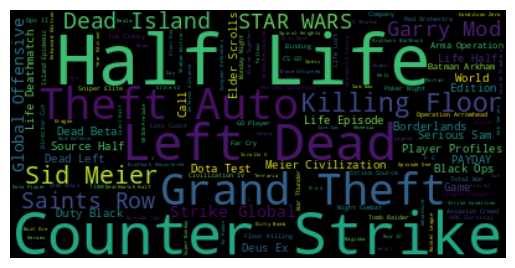

In [ ]:
# Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Convertimos todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(item_nombre) for item_nombre in df2.item_nombre)

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
value_counts = df2["item_nombre"].value_counts()

In [ ]:
print(value_counts)

Garry's Mod                         71
Counter-Strike: Global Offensive    70
Dota 2 Test                         68
Unturned                            63
Left 4 Dead 2 Beta                  58
                                    ..
Hotline Miami 2: Wrong Number        1
Yatagarasu Attack on Cataclysm       1
Space Hulk Ascension                 1
The Red Solstice                     1
Ragnarok                             1
Name: item_nombre, Length: 2740, dtype: int64


In [ ]:
for item, count in value_counts.iteritems():
    print(f"{item}: {count}")

Garry's Mod: 71
Counter-Strike: Global Offensive: 70
Dota 2 Test: 68
Unturned: 63
Left 4 Dead 2 Beta: 58
Left 4 Dead 2: 58
Terraria: 54
Warframe: 51
Portal 2: 45
PAYDAY 2: 43
Half-Life 2: Lost Coast: 41
Robocraft: 41
Half-Life 2: 36
Dead Island: Epidemic: 36
War Thunder: 34
Heroes & Generals: 34
Borderlands 2: 33
Half-Life 2: Deathmatch: 33
Counter-Strike: Source: 33
Trove: 32
Dirty Bomb: 32
The Elder Scrolls V: Skyrim: 31
Loadout: 30
No More Room in Hell: 29
PAYDAY: The Heist: 29
PlanetSide 2: 29
Spiral Knights: 29
Half-Life Deathmatch: Source: 28
Portal: 28
Super Monday Night Combat: 28
Dead Island: 27
Half-Life 2: Episode One: 27
Don't Starve Together: 27
Saints Row: The Third: 27
Half-Life 2: Episode Two: 26
Killing Floor Mod: Defence Alliance 2: 26
Killing Floor: 26
ORION: Prelude: 25
Fistful of Frags: 24
Rocket League: 24
Arma 2: 24
Castle Crashers: 23
The Binding of Isaac: 23
Sniper Elite V2: 23
Evolve Stage 2: 22
Saints Row IV: 22
Arma 2: Operation Arrowhead Beta (Obsolete): 22

<ipython-input-162-223bcbcfef9a>:1: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Quake Mission Pack 1: Scourge of Armagon: 3
Star Chronicles: Delta Quadrant: 3
Edge of Space: 3
Quake Mission Pack 2: Dissolution of Eternity: 3
Batla: 3
Legend of Grimrock: 3
DLC Quest: 3
RWBY: Grimm Eclipse: 3
LawBreakers: 3
Democracy 3: 3
Symphony: 3
Sam & Max 302: The Tomb of Sammun-Mak: 3
Back to the Future: Ep 3 - Citizen Brown: 3
Endless Space: 3
Blood Bowl: Legendary Edition: 3
WARMODE: 3
Knights and Merchants: 3
Darksiders II: Deathinitive Edition: 3
100% Orange Juice: 3
Divinity II: Developer's Cut: 3
The SKIES: 3
Starseed Pilgrim: 3
Remember Me: 3
Hammerwatch: 3
Back to the Future: Ep 5 - OUTATIME: 3
Shovel Knight: 3
Lichdom: Battlemage: 3
Quantum Conundrum: 3
Pirates of Black Cove Gold: 3
Thief Gold: 3
Shadowgrounds: Survivor: 3
Escape Rosecliff Island: 3
Dragon Nest: 3
Sam & Max 305: The City that Dares not Sleep: 3
Sam & Max 304: Beyond the Alley of the Dolls: 3
Disney Infinity 3.0: Play Without Limits: 3
Peggle Deluxe: 3
Sam & Max 303: They Stole Max's Brain!: 3
Spore: C

In [ ]:
df2.head()

user_id  items_cantidad           steam_id  \
0  76561197970982479             277  76561197970982479   
1  76561197970982479             277  76561197970982479   
2  76561197970982479             277  76561197970982479   
3  76561197970982479             277  76561197970982479   
4  76561197970982479             277  76561197970982479   

                                         usuario_url item_id  \
0  http://steamcommunity.com/profiles/76561197970...      10   
1  http://steamcommunity.com/profiles/76561197970...      20   
2  http://steamcommunity.com/profiles/76561197970...      30   
3  http://steamcommunity.com/profiles/76561197970...      40   
4  http://steamcommunity.com/profiles/76561197970...      50   

                 item_nombre  tiempo_Juego_total  tiempo_de_Juego_en_2_semanas  
0             Counter-Strike                 6.0                           0.0  
1      Team Fortress Classic                 0.0                           0.0  
2              Day of Defeat                 7.0                           0.0  
3         Deathmatch Classic                 0.0                           0.0  
4  Half-Life: Opposing Force                 0.0                           0.0

**Tiempo juego total**

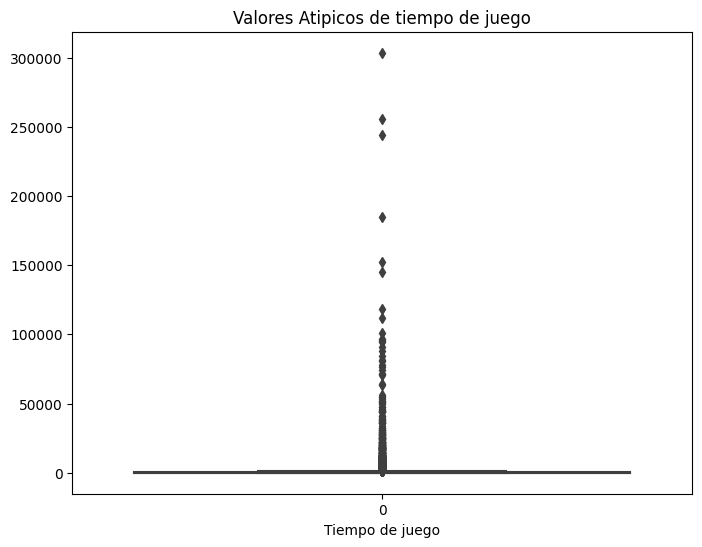

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(df2['tiempo_Juego_total'])
plt.xlabel('Tiempo de juego')
plt.title('Valores Atipicos de tiempo de juego')
plt.show()

# **Modelo de aprendizaje automático**

Es hora de entrenar nuestro modelo de machine learning para armar un sistema de recomendación.

Si es un sistema de recomendación item-item:

**def recomendacion_juego( id de producto ): Ingresando el id de producto, deberíamos recibir una lista con 5 juegos recomendados similares al ingresado.**

Si es un sistema de recomendación user-item:

**def recomendacion_usuario( id de usuario ): Ingresando el id de un usuario, deberíamos recibir una lista con 5 juegos recomendados para dicho usuario.**

In [ ]:
df1_aprendizaje = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_steam_games.csv',
                  na_values=':', usecols=['Genero','Nombre_del_contenido','Etiquetas','Especificaciones','Id'])


In [ ]:
df1_aprendizaje.head(1)

In [ ]:
df2_aprendizaje = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_user_items.csv')

In [ ]:
df2_aprendizaje = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_user_items.csv',
                  na_values=':', usecols=['user_id','item_id','item_nombre'])

In [ ]:
df2_aprendizaje.head(2)

In [ ]:
df2_aprendizaje.columns = ['user_id','Id','item_nombre']

In [ ]:
merge_recomendacion = pd.merge(df1_aprendizaje,df2_aprendizaje, on = "Id")

In [ ]:
merge_recomendacion.head(4)

In [ ]:
merge_recomendacion.shape

In [ ]:
merge_recomendacion = merge_recomendacion[20000:40000]

In [ ]:
merge_recomendacion["user_id"] = merge_recomendacion["user_id"].apply(str)

In [ ]:
merge_recomendacion.info()

In [ ]:
merge_recomendacion.dtypes

In [ ]:
#len(df_gral['Id'].unique())

In [ ]:
#len(df_gral['Etiquetas'].unique())

In [ ]:
#len(df_gral['Genero'].unique())

In [ ]:
#Guardar el DataFrame en un archivo CSV
merge_recomendacion.to_csv("/content/drive/MyDrive/Proyect_games/dfx_merge_sistema.csv", index=True)